In [134]:
# Streamlit pradžia

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
from Skriptai.manofunkcijos import *

In [136]:
# Prekių grupė - šaldytuvai. Įvertinkite kainas, jų pasiskirstymą pagal montavimo tipą - pastatomas
# ar įmontuojamas? Įvertinkite įtaką kainoms pagal šaldytuvo tipą - mini, dviduris, su
# šaldikliu apačioje, etc ... Ar yra kainų lygio priklausomybė nuo šaldytuvo tūrio, geometrinių
# matmenų, energijos klasės, triukšmo lygio, energijos sąnaudų, valdymo pobūdžio (mechaninis,
# sensorinis, mygtukinis ar elektroninis valdymas)? Pateikite trendų grafikus, jei pastebite,
# jog gali egzistuoti priklausomybė. Įvertinkite kainų lygius (kainų pasiskirstymą) pagal gamintoją.
# Neimkite gamintojų, kurių prekių yra tik po 1-2 vnt. Ar kainų lygiui turi įtaką produkto
# spalva?

In [137]:
varle = query_to_dataframe('../../../web_scrap.db','select * from varlelt;')
varle['Portalas'] = varle['Kaina'].apply(lambda x: 'Varlė.lt')
pigu = query_to_dataframe('../../../web_scrap.db','select * from pigult;')
pigu['Portalas'] = pigu['Kaina'].apply(lambda x: 'Pigu.lt')

In [138]:
varle['Kategorija'] = varle['Skelbimo_tipas'].apply(lambda x: x.replace('https://www.varle.lt/','').replace('/',''))
varle['Kaina'] = varle['Kaina'].apply(lambda x: x.replace(' €',''))

In [139]:
varle_sald = varle[varle['Kategorija'] == 'saldytuvai']
pigu_sald = pigu[pigu['Kategorija'] == 'Šaldytuvai']
pigu_sald['Talpa (L)'] = pigu_sald['Bendra talpa'].apply(lambda x: float(x.replace(' l','')) if x != None else None)
varle_sald['Talpa (L)'] = varle_sald['Talpa (L)'].apply(lambda x: float(x) if x != None else None)
pigu_sald['Maksimalus triukšmo lygis'] = pigu_sald['Maksimalus triukšmo lygis'].apply(lambda x: float(x.replace(' dB','')) if x != None and x != '- dB' else None)
pigu_sald['Energijos sąnaudos'] = pigu_sald['Energijos sąnaudos'].apply(lambda x: float(x.replace(' kWh/24 h','')) if x != None and x != '- kWh/24 h' and x != 'Nenurodyta kWh/24 h' else None)

In [140]:
def mont_tip(x):
    if x == 'Įmontuojami' or x == 'Montuojami':
        return 'Įmontuojamas'
    elif x == 'Laisvai statomi':
        return 'Laisvai pastatomas'
    else:
        return None

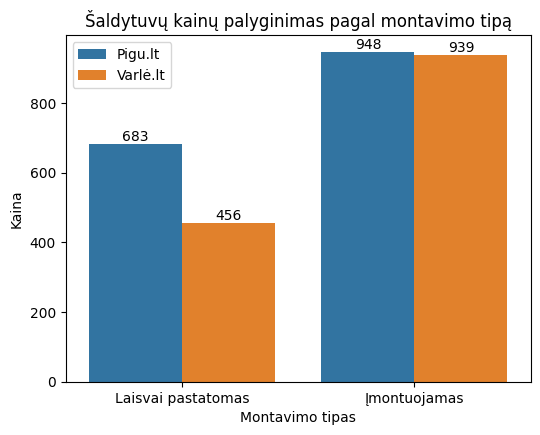

In [141]:
varle_sald['Montavimo tipas'] = varle_sald['Montavimo tipas'].apply(mont_tip)
dfx = varle_sald[['Kaina', 'Montavimo tipas','Portalas']]
dfy = pigu_sald[['Kaina', 'Montavimo tipas', 'Portalas']]
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
df['Kaina'] = df['Kaina'].apply(lambda x: float(x))
df_graf = df.groupby(['Montavimo tipas','Portalas'])['Kaina'].mean().reset_index()
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
fig, axes = plt.subplots(figsize=(6,4.5))
axes.set_title(f'Šaldytuvų kainų palyginimas pagal montavimo tipą')
ax =sns.barplot(data=df_graf,x = 'Montavimo tipas', y='Kaina', ax=axes, hue= 'Portalas')
for container in ax.containers:
    ax.bar_label(container)
axes.legend()
plt.show()

In [ ]:
pigu_sald_tip = list(set(pigu_sald['Šaldytuvo tipas']))
varle_sald_tip = list(set(varle_sald['Tipas']))

[None, 'Šaldytuvas be šaldiklio', 'Vitrininis šaldytuvas', 'Šaldytuvas su šaldikliu apačioje', 'Šaldytuvas su šaldikliu viršuje', 'Mini šaldytuvas', 'Įmontuojamas šaldytuvas', 'Dviduris šaldytuvas']
[None, 'Su kamera viduje', 'Mini', 'Su kamera', 'Su kamera viršuje', 'Vienaduriai', 'Be kameros', 'Vitrina', 'Mini\n\nSu kamera viduje', 'Dviduriai', 'Su kamera apačioje']


In [143]:
def sald_tip(x):
    if x == 'Su kamera viduje' or x == 'Su kamera' or x == 'Su kamera viršuje':
        return 'Šaldytuvas su šaldikliu viršuje'
    elif x == 'Su kamera apačioje':
        return 'Šaldytuvas su šaldikliu apačioje'
    elif x == 'Be kameros' or x == 'Vienaduriai':
        return 'Šaldytuvas be šaldiklio'
    elif x == 'Mini\n\nSu kamera viduje' or x == 'Mini':
        return 'Mini šaldytuvas'
    elif x == 'Vitrina':
        return 'Vitrininis šaldytuvas'
    elif x == 'Dviduriai':
        return 'Dviduris šaldytuvas'
    else:
        None

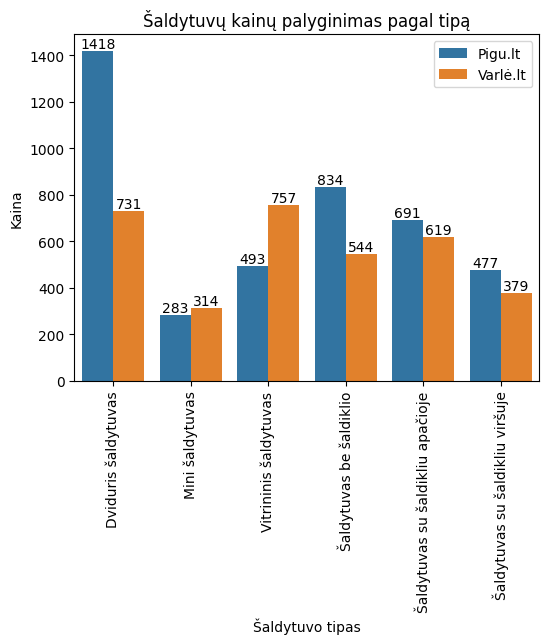

In [144]:
varle_sald['Šaldytuvo tipas'] = varle_sald['Tipas'].apply(sald_tip)
dfx = varle_sald[['Kaina', 'Šaldytuvo tipas', 'Portalas']]
dfy = pigu_sald[['Kaina', 'Šaldytuvo tipas', 'Portalas']]
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
df = df[df['Šaldytuvo tipas'] != 'Įmontuojamas šaldytuvas']
df['Kaina'] = df['Kaina'].apply(lambda x: float(x))
df_graf = df.groupby(['Šaldytuvo tipas','Portalas'])['Kaina'].mean().reset_index()
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
fig, axes = plt.subplots(figsize=(6,4.5))
axes.set_title(f'Šaldytuvų kainų palyginimas pagal tipą')
ax =sns.barplot(data=df_graf,x = 'Šaldytuvo tipas', y='Kaina', ax=axes, hue= 'Portalas')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes.legend()
plt.show()

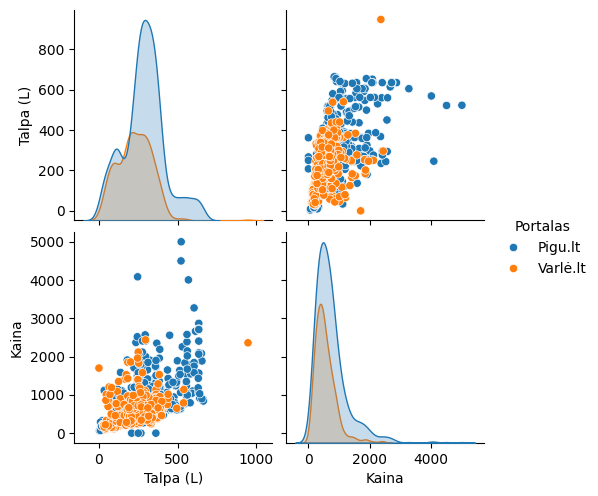

In [145]:
dfx = pigu_sald[['Talpa (L)','Kaina','Portalas']]
dfy = varle[['Talpa (L)','Kaina','Portalas']]
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
df['Kaina'] = df['Kaina'].apply(lambda x: float(x))
df['Talpa (L)'] = df['Talpa (L)'].apply(lambda x: float(x))
sns.pairplot(data=df,hue='Portalas')
plt.show()

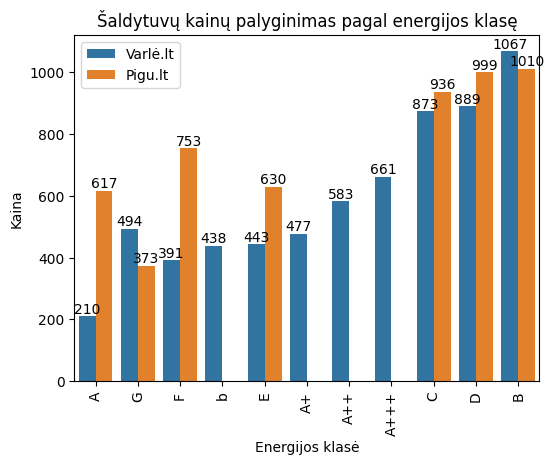

In [146]:
dfx = varle_sald[['Kaina', 'Energijos klasė', 'Portalas']]
dfy = pigu_sald[['Kaina', 'Energijos klasė', 'Portalas']]
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
df['Kaina'] = df['Kaina'].apply(lambda x: float(x))
df_graf = df.groupby(['Energijos klasė','Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=True)
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
fig, axes = plt.subplots(figsize=(6,4.5))
axes.set_title(f'Šaldytuvų kainų palyginimas pagal energijos klasę')
ax =sns.barplot(data=df_graf,x = 'Energijos klasė', y='Kaina', ax=axes, hue= 'Portalas')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes.legend()
plt.show()

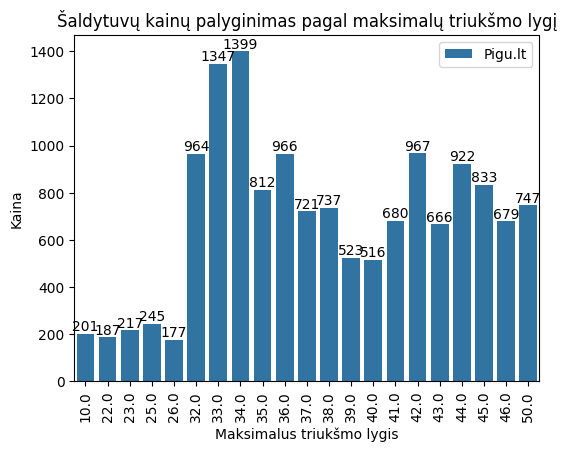

In [147]:
df = pigu_sald[['Kaina', 'Maksimalus triukšmo lygis', 'Portalas']]
df.dropna(inplace=True)
df['Kaina'] = df['Kaina'].apply(lambda x: float(x))
df_graf = df.groupby(['Maksimalus triukšmo lygis','Portalas'])['Kaina'].mean().reset_index()
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
fig, axes = plt.subplots(figsize=(6,4.5))
axes.set_title(f'Šaldytuvų kainų palyginimas pagal maksimalų triukšmo lygį')
ax =sns.barplot(data=df_graf,x = 'Maksimalus triukšmo lygis', y='Kaina', ax=axes, hue= 'Portalas')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes.legend()
plt.show()

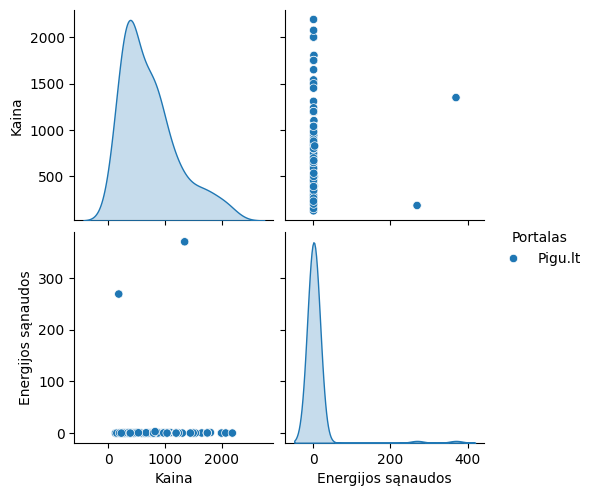

In [148]:
df = pigu_sald[['Kaina', 'Energijos sąnaudos', 'Portalas']]
df.dropna(inplace=True)
df['Kaina'] = df['Kaina'].apply(lambda x: float(x))
sns.pairplot(data=df,hue='Portalas')
plt.show()

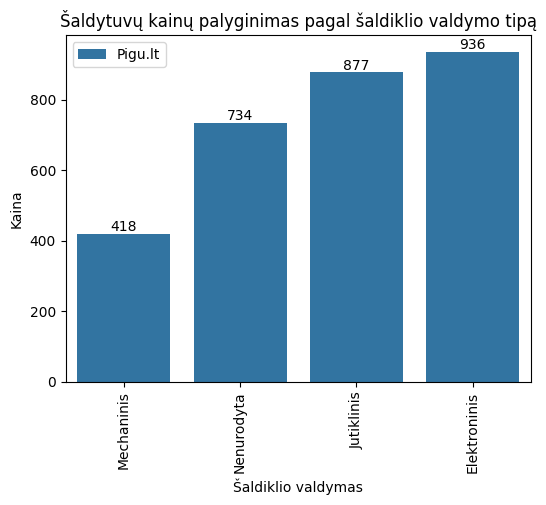

In [149]:
df = pigu_sald[['Kaina', 'Šaldiklio valdymas', 'Portalas']]
df.dropna(inplace=True)
df['Kaina'] = df['Kaina'].apply(lambda x: float(x))
df_graf = df.groupby(['Šaldiklio valdymas','Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=True)
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
fig, axes = plt.subplots(figsize=(6,4.5))
axes.set_title(f'Šaldytuvų kainų palyginimas pagal šaldiklio valdymo tipą')
ax =sns.barplot(data=df_graf,x = 'Šaldiklio valdymas', y='Kaina', ax=axes, hue= 'Portalas')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes.legend()
plt.show()

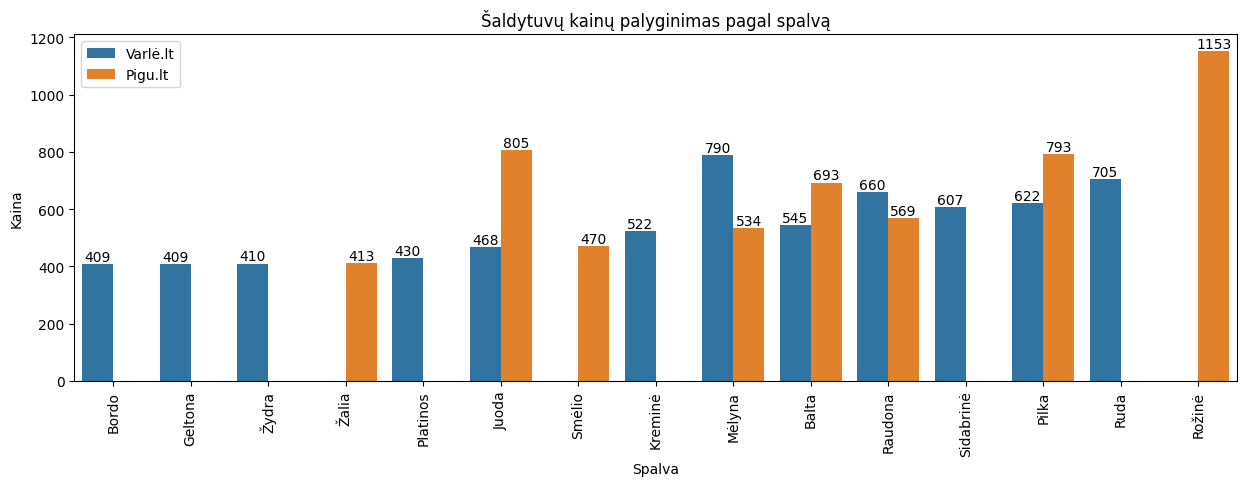

In [150]:
dfx = varle_sald[['Kaina', 'Spalva', 'Portalas']]
dfy = pigu_sald[['Kaina', 'Spalva', 'Portalas']]
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
df['Kaina'] = df['Kaina'].apply(lambda x: float(x))
df['Spalva'] = df['Spalva'].apply(lambda x: x.split(',')[0] if x != None else None)
df['Spalva'] = df['Spalva'].apply(lambda x: x.split('\n\n')[0] if x != None else None)
df_graf = df.groupby(['Spalva','Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=True)
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
fig, axes = plt.subplots(figsize=(15,4.5))
axes.set_title(f'Šaldytuvų kainų palyginimas pagal spalvą')
ax =sns.barplot(data=df_graf,x = 'Spalva', y='Kaina', ax=axes, hue= 'Portalas')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes.legend()
plt.show()

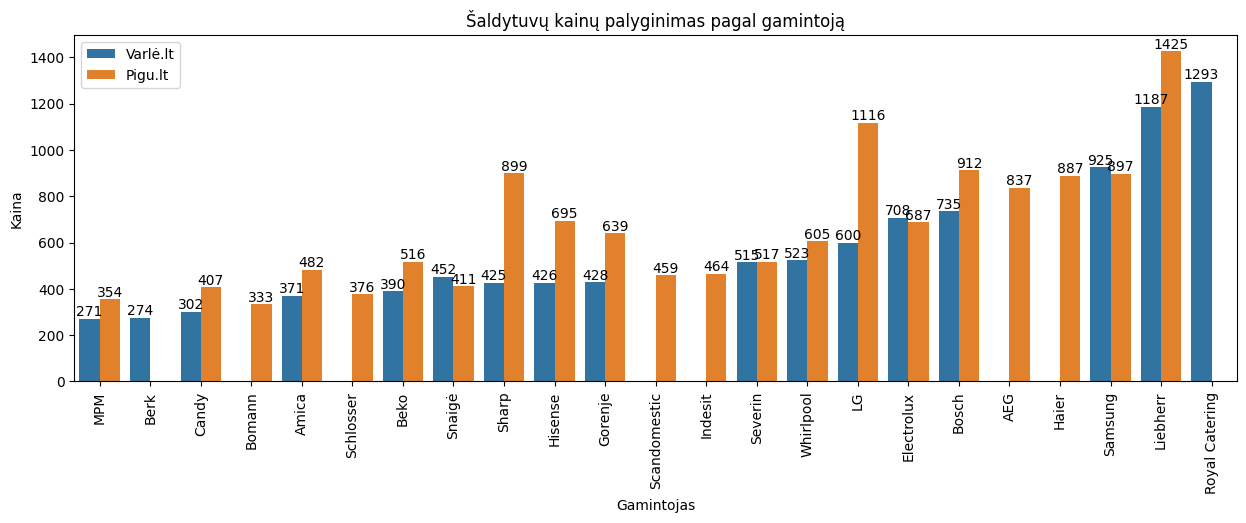

In [151]:
dfx = varle_sald[['Kaina', 'Gamintojas', 'Portalas']]
dfy = pigu_sald[['Kaina', 'Gamintojas', 'Portalas']]
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
df['Kaina'] = df['Kaina'].apply(lambda x: float(x))
df_pop = df.groupby(['Gamintojas','Portalas'])['Kaina'].count().reset_index()
df_pop['Kiekis'] = df_pop['Kaina'].apply(lambda x: x)
df_pop = df_pop[['Kiekis', 'Gamintojas', 'Portalas']]
df_graf = df.groupby(['Gamintojas','Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=True)
df_graf = pd.merge(df_graf, df_pop, how='left', on=['Gamintojas', 'Portalas'])
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
df_graf = df_graf[df_graf['Kiekis'] > 10]
fig, axes = plt.subplots(figsize=(15,4.5))
axes.set_title(f'Šaldytuvų kainų palyginimas pagal gamintoją')
ax =sns.barplot(data=df_graf,x = 'Gamintojas', y='Kaina', ax=axes, hue= 'Portalas')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes.legend()
plt.show()

In [152]:
# Prekių grupė - dronai. Įvertinkite kainas, jų pasiskirstymą tarp skirtingų gamintojų. Ar kainoms
# turi įtaką skridimo trukmė, skrydžio atstumas, GPS buvimas/nebuvimas, drono svoris,
# kameros buvimas/nebuvimas, stabilizacijos buvimas/nebuvimas, akumuliatoriaus (baterijos)
# talpa (mAh)? Suskirstykite dronus pagal kainų rėžius (iki 100 €, 101-200 €, 201-400 €, 401 -
# 600 € ir virš 600 €), bei atrinkite (apibūdinkite) iš kiekvieno rėžio po droną, labiausiai reprezentuojantį
# kainų rėžį (vidutiniškiausią droną iš kainų rėžio).

In [153]:
def gps(x):
    if x != None:
        if x.count('GPS')>0:
            return 'Yra'
        else:
            return 'Nėra'
    else:
        return 'Nėra'
    
def kamera(x):
    if x != None:
        if x.count('kamera')>0:
            return 'Yra'
        else:
            return 'Nėra'
    else:
        return 'Nėra'
    
def kaina(x):
    if x <= 100:
        return 'iki 100 €'
    elif x > 100 and x <= 200:
        return '101-200 €'
    elif x > 200 and x <= 400:
        return '201-400 €'
    elif x > 400 and x <= 600:
        return '401-600 €'
    elif x > 600:
        return 'virš 600 €'

In [154]:
varle_dron = varle[varle['Kategorija'] == 'dronai']
pigu_dron = pigu[pigu['Kategorija'] == 'Dronai']

pigu_dron['Kaina'] = pigu_dron['Kaina'].apply(lambda x: float(x) if x != None else None)
varle_dron['Kaina'] = varle_dron['Kaina'].apply(lambda x: float(x) if x != None else None)
pigu_dron['Skraidymo laikas'] = pigu_dron['Skraidymo laikas'].apply(lambda x: float(x.replace(' min.','')) if x != '- min.' and x != None else None)
varle_dron['Skraidymo laikas'] = varle_dron['Veikimo laikas (min)'].apply(lambda x: float(x) if x != None else None)
pigu_dron['Veikimo atstumas'] = pigu_dron['Veikimo atstumas'].apply(lambda x: float(x.replace(' m','')) if x != '-'  else None)
pigu_dron['GPS'] = pigu_dron['GPS'].apply(lambda x: 'Yra' if x == 'Yra' else 'Nėra')
varle_dron['GPS'] = varle_dron['Tipas'].apply(gps)
pigu_dron['Svoris'] = pigu_dron['Svoris'].apply(lambda x: float(x.replace(' g','')) if x != None and x != '- g' else None )
varle_dron['Svoris'] = varle_dron['Svoris (kg)'].apply(lambda x: float(x)*1000 if x != None else None)
pigu_dron['Kamera'] = pigu_dron['Kamera'].apply(lambda x: 'Yra' if x == 'Taip' else 'Nėra')
varle_dron['Kamera'] = varle_dron['Tipas'].apply(kamera)
pigu_dron['Skrydžio stabilizacija'] = pigu_dron['Skrydžio stabilizacija'].apply(lambda x: 'Yra' if x == 'Yra' else 'Nėra')
varle_dron['Baterijos talpa (mAh)'] = varle_dron['Baterijos talpa (mAh)'].apply(lambda x: float(x) if x != None else None)
pigu_dron['Kaina_Group'] = pigu_dron['Kaina'].apply(kaina)
varle_dron['Kaina_Group'] = varle_dron['Kaina'].apply(kaina)

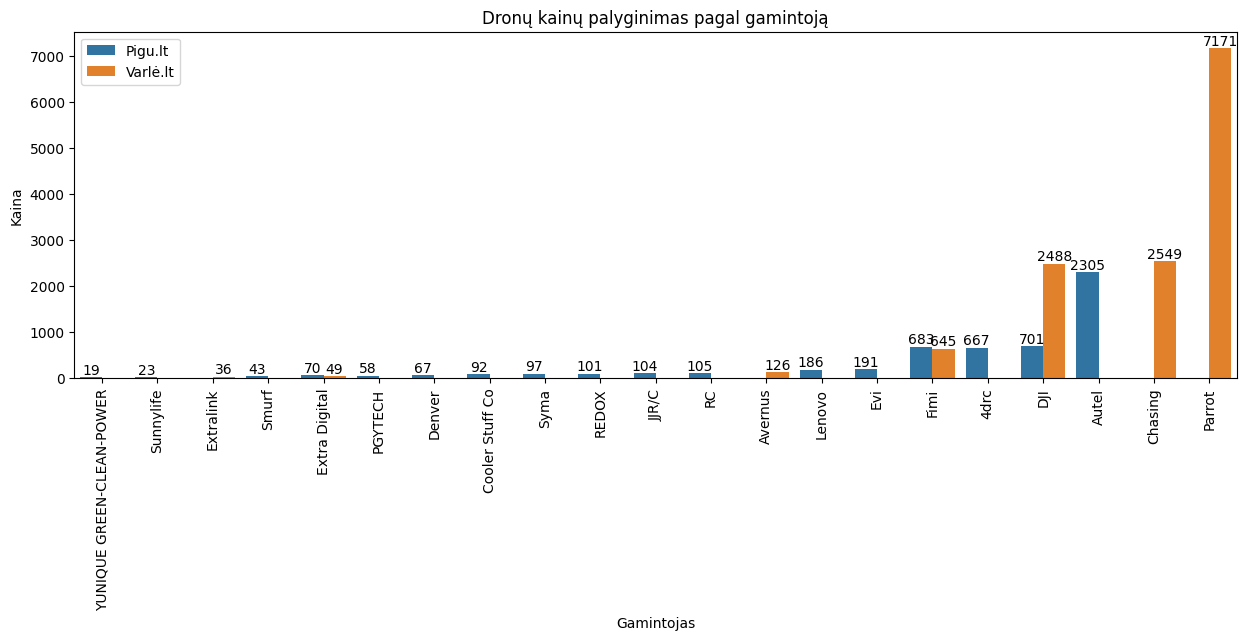

In [155]:
dfx = varle_dron[['Kaina', 'Gamintojas', 'Portalas']]
dfy = pigu_dron[['Kaina', 'Gamintojas', 'Portalas']]
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
df['Kaina'] = df['Kaina'].apply(lambda x: float(x))
df_pop = df.groupby(['Gamintojas','Portalas'])['Kaina'].count().reset_index()
df_pop['Kiekis'] = df_pop['Kaina'].apply(lambda x: x)
df_pop = df_pop[['Kiekis', 'Gamintojas', 'Portalas']]
df_graf = df.groupby(['Gamintojas','Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=True)
df_graf = pd.merge(df_graf, df_pop, how='left', on=['Gamintojas', 'Portalas'])
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
df_graf = df_graf[df_graf['Kiekis'] > 2]
fig, axes = plt.subplots(figsize=(15,4.5))
axes.set_title(f'Dronų kainų palyginimas pagal gamintoją')
ax =sns.barplot(data=df_graf,x = 'Gamintojas', y='Kaina', ax=axes, hue= 'Portalas')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes.legend()
plt.show()

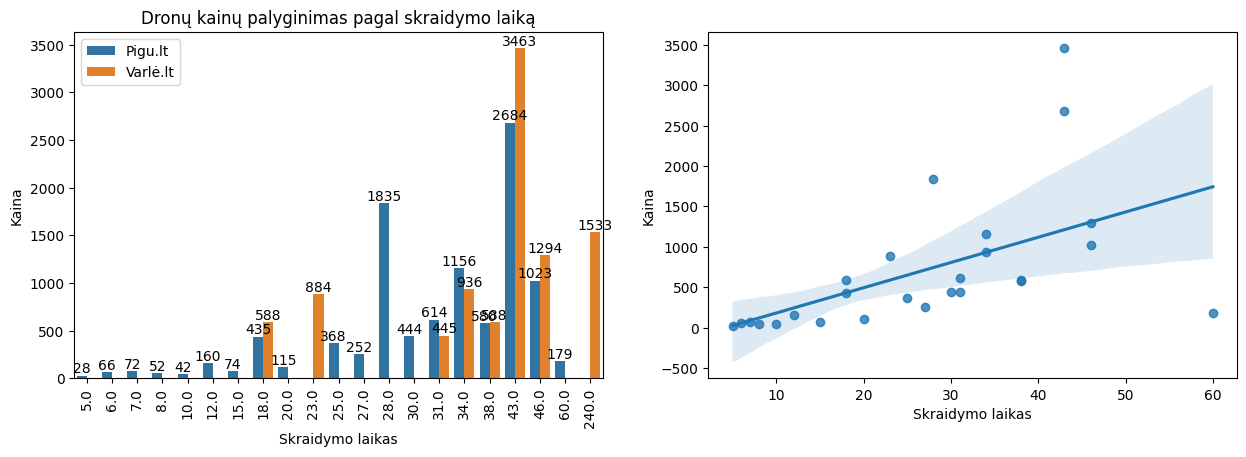

In [156]:
dfx = varle_dron[['Kaina', 'Skraidymo laikas', 'Portalas']]
dfy = pigu_dron[['Kaina', 'Skraidymo laikas', 'Portalas']]
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
df_pop = df.groupby(['Skraidymo laikas','Portalas'])['Kaina'].count().reset_index()
df_pop['Kiekis'] = df_pop['Kaina'].apply(lambda x: x)
df_pop = df_pop[['Kiekis', 'Skraidymo laikas', 'Portalas']]
df_graf = df.groupby(['Skraidymo laikas','Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=True)
df_graf = pd.merge(df_graf, df_pop, how='left', on=['Skraidymo laikas', 'Portalas'])
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
df_graf = df_graf[df_graf['Kiekis'] > 2]
fig, axes = plt.subplots(1,2,figsize=(15,4.5))
axes[0].set_title(f'Dronų kainų palyginimas pagal skraidymo laiką')
ax =sns.barplot(data=df_graf,x = 'Skraidymo laikas', y='Kaina', ax=axes[0], hue= 'Portalas')
sns.regplot(data=df_graf[df_graf['Skraidymo laikas']<100], x = 'Skraidymo laikas', y = 'Kaina', order=1)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes[0].legend()
plt.show()

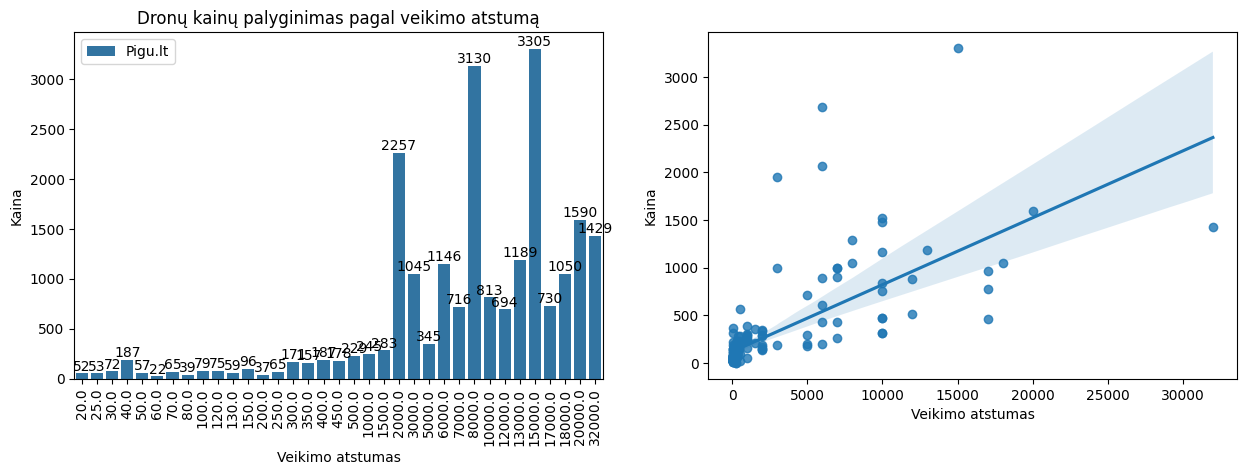

In [157]:
df = pigu_dron[['Kaina', 'Veikimo atstumas', 'Portalas']]
df.dropna(inplace=True)
df_graf = df.groupby(['Veikimo atstumas','Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=True)
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
df = df[df['Kaina']<6000]
fig, axes = plt.subplots(1,2,figsize=(15,4.5))
axes[0].set_title(f'Dronų kainų palyginimas pagal veikimo atstumą')
ax =sns.barplot(data=df_graf,x = 'Veikimo atstumas', y='Kaina', ax=axes[0], hue= 'Portalas')
sns.regplot(data=df, x = 'Veikimo atstumas', y = 'Kaina', order=1)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes[0].legend()
plt.show()

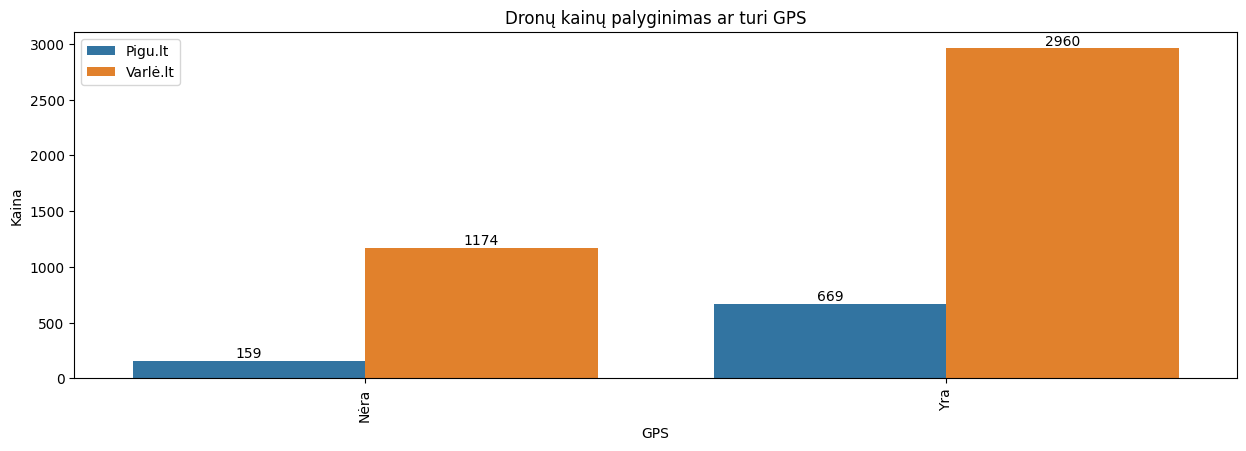

In [158]:
dfx = varle_dron[['Kaina', 'GPS', 'Portalas']]
dfy = pigu_dron[['Kaina', 'GPS', 'Portalas']]
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
df_graf = df.groupby(['GPS','Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=True)
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
fig, axes = plt.subplots(figsize=(15,4.5))
axes.set_title(f'Dronų kainų palyginimas ar turi GPS')
ax =sns.barplot(data=df_graf,x = 'GPS', y='Kaina', ax=axes, hue= 'Portalas')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes.legend()
plt.show()

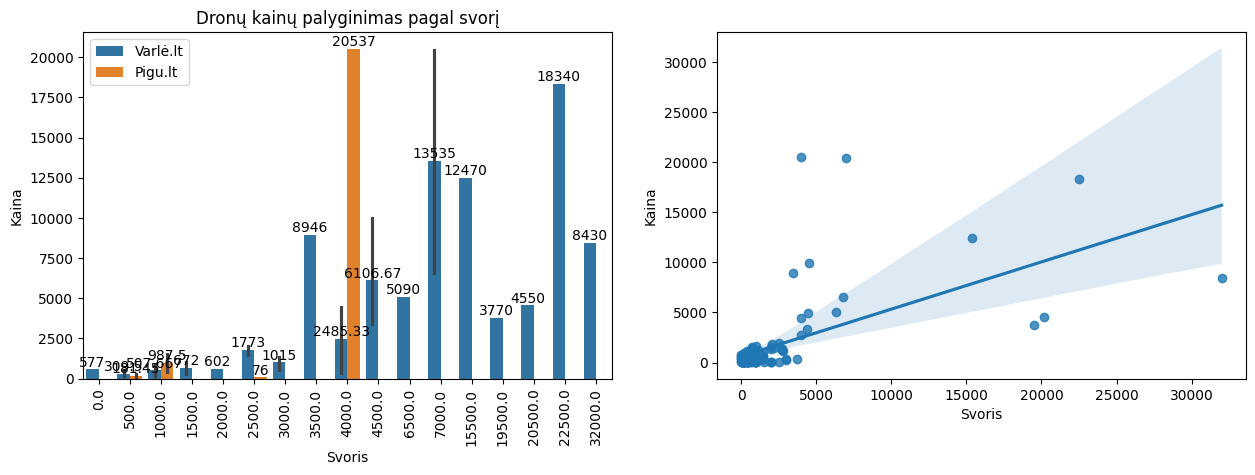

In [159]:
dfx = varle_dron[['Kaina', 'Svoris', 'Portalas']]
dfy = pigu_dron[['Kaina', 'Svoris', 'Portalas']]
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
df_graf = df.groupby(['Svoris','Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=True)
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
df_graf['Svoris'] = df_graf['Svoris'].apply(lambda x: (np.ceil(x/500))*500)
fig, axes = plt.subplots(1,2,figsize=(15,4.5))
axes[0].set_title(f'Dronų kainų palyginimas pagal svorį')
ax =sns.barplot(data=df_graf,x = 'Svoris', y='Kaina', ax=axes[0], hue= 'Portalas')
sns.regplot(data=df, x = 'Svoris', y = 'Kaina', order=1)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes[0].legend()
plt.show()

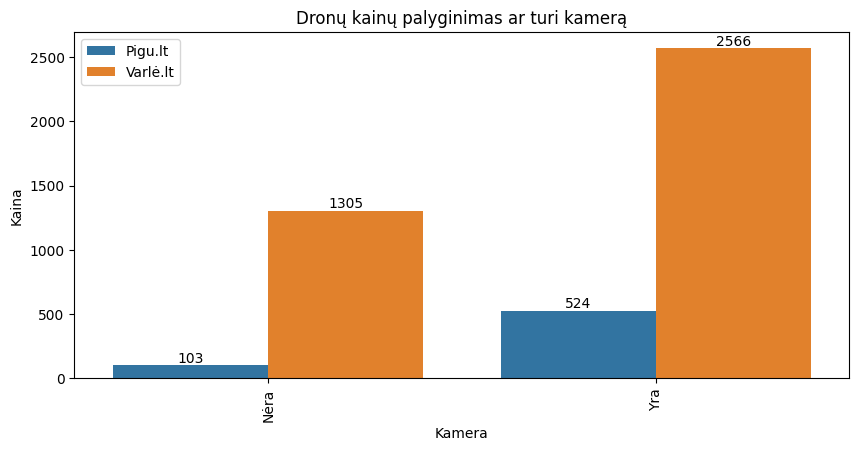

In [160]:
dfx = varle_dron[['Kaina', 'Kamera', 'Portalas']]
dfy = pigu_dron[['Kaina', 'Kamera', 'Portalas']]
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
df['Kaina'] = df['Kaina'].apply(lambda x: float(x))
df_graf = df.groupby(['Kamera','Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=True)
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
fig, axes = plt.subplots(figsize=(10,4.5))
axes.set_title(f'Dronų kainų palyginimas ar turi kamerą')
ax =sns.barplot(data=df_graf,x = 'Kamera', y='Kaina', ax=axes, hue= 'Portalas')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes.legend()
plt.show()

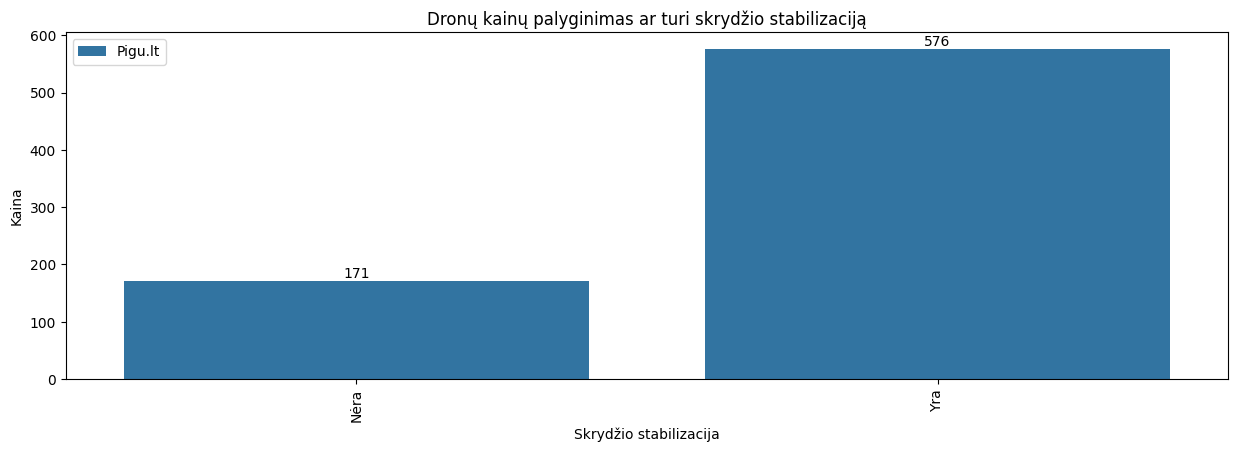

In [161]:
df = pigu_dron[['Kaina', 'Skrydžio stabilizacija', 'Portalas']]
df.dropna(inplace=True)
df['Kaina'] = df['Kaina'].apply(lambda x: float(x))
df_graf = df.groupby(['Skrydžio stabilizacija','Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=True)
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
fig, axes = plt.subplots(figsize=(15,4.5))
axes.set_title(f'Dronų kainų palyginimas ar turi skrydžio stabilizaciją')
ax =sns.barplot(data=df_graf,x = 'Skrydžio stabilizacija', y='Kaina', ax=axes, hue= 'Portalas')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes.legend()
plt.show()

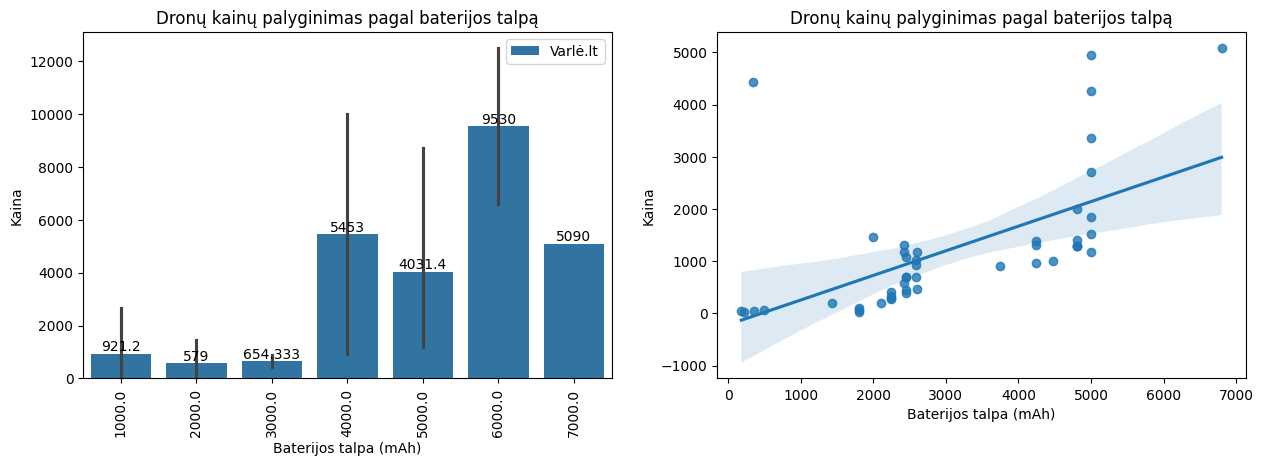

In [162]:
df = varle_dron[['Kaina', 'Baterijos talpa (mAh)', 'Portalas']]
df.dropna(inplace=True)
df_graf = df.groupby(['Baterijos talpa (mAh)','Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=True)
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
df_graf['Baterijos talpa (mAh)'] = df_graf['Baterijos talpa (mAh)'].apply(lambda x: (np.ceil(x/1000))*1000)
df = df[df['Kaina']<6000]
fig, axes = plt.subplots(1,2,figsize=(15,4.5))
axes[0].set_title(f'Dronų kainų palyginimas pagal baterijos talpą')
axes[1].set_title(f'Dronų kainų palyginimas pagal baterijos talpą')
ax =sns.barplot(data=df_graf,x = 'Baterijos talpa (mAh)', y='Kaina', ax=axes[0], hue= 'Portalas')
sns.regplot(data=df, x = 'Baterijos talpa (mAh)', y='Kaina')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes[0].legend()
plt.show()

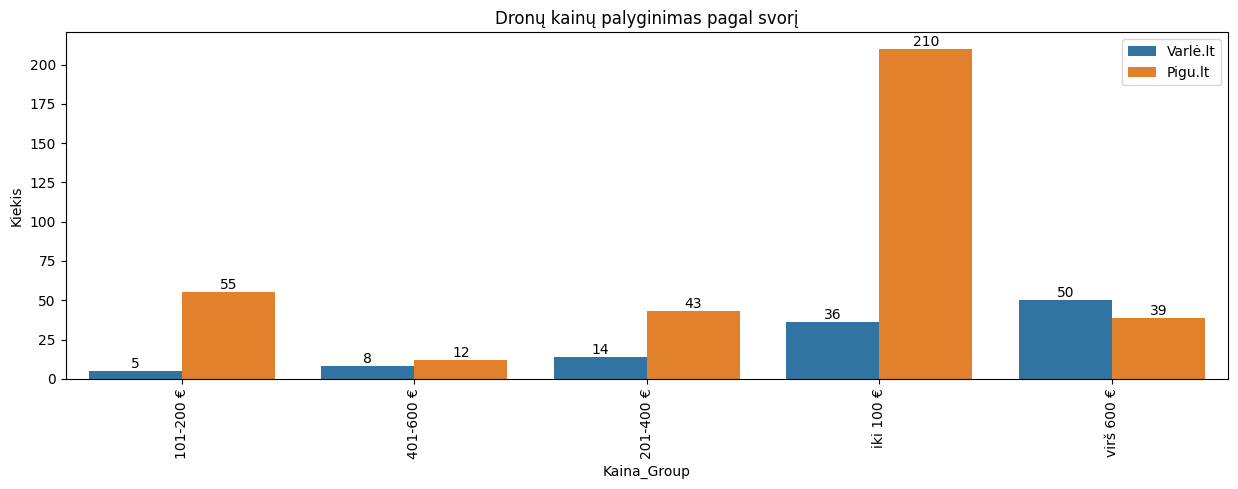

In [163]:
dfx = varle_dron[['Kaina', 'Kaina_Group', 'Portalas']]
dfy = pigu_dron[['Kaina', 'Kaina_Group', 'Portalas']]
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
df_graf = df.groupby(['Kaina_Group','Portalas'])['Kaina'].count().reset_index().sort_values(by='Kaina', ascending=True)
df_graf['Kiekis'] = df_graf['Kaina']
fig, axes = plt.subplots(figsize=(15,4.5))
axes.set_title(f'Dronų kainų palyginimas pagal svorį')
ax =sns.barplot(data=df_graf,x = 'Kaina_Group', y='Kiekis', ax=axes, hue= 'Portalas')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes.legend()
plt.show()

In [202]:
dfx = varle_dron[['Kaina', 'Kaina_Group', 'Portalas','Baterijos talpa (mAh)','Kamera','GPS','Skraidymo laikas','Gamintojas']]
dfy = pigu_dron[['Kaina', 'Kaina_Group', 'Portalas','Baterijos talpa (mAh)','Kamera','GPS','Skraidymo laikas','Gamintojas']]

zodynas = {}
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
grupes = list(set(df['Kaina_Group']))
for gr in grupes:
    zod = {}
    dfq = df[df['Kaina_Group'] == gr]
    zod['Portalas'] = list(dfq.groupby(['Portalas'])['Kaina'].count().reset_index().sort_values(by='Kaina', ascending=False)[:1]['Portalas'])
    zod['Kamera'] = list(dfq.groupby(['Kamera'])['Kaina'].count().reset_index().sort_values(by='Kaina', ascending=False)[:1]['Kamera'])
    min_val = min(list(set(dfq['Baterijos talpa (mAh)'])))
    max_val = max(list(set(dfq['Baterijos talpa (mAh)'])))
    zod['Baterijos talpa'] = f'{min_val}-{max_val}'
    zod['GPS'] = list(dfq.groupby(['GPS'])['Kaina'].count().reset_index().sort_values(by='Kaina', ascending=False)[:1]['GPS'])
    min_val = min(list(set(dfq['Skraidymo laikas'])))
    max_val = max(list(set(dfq['Skraidymo laikas'])))
    zod['Skraidymo laikas'] = f'{min_val}-{max_val}'
    zod['Gamintojas'] = list(set(dfq['Gamintojas']))
    zodynas[gr] = zod
ndf = pd.DataFrame(zodynas)
ndf.head(10)

,virš 600 €,iki 100 €,401-600 €,201-400 €
Portalas,[Varlė.lt],[Varlė.lt],[Varlė.lt],[Varlė.lt]
Kamera,[Yra],[Nėra],[Yra],[Yra]
Baterijos talpa,335.0-6800.0,500.0-1800.0,2250.0-2600.0,1435.0-2453.0
GPS,[Yra],[Nėra],[Nėra],[Yra]
Skraidymo laikas,18.0-240.0,9.0-18.0,18.0-33.0,18.0-38.0
Gamintojas,"[DJI, Chasing, Parrot]","[Avernus, X Imvnlei]",[DJI],"[DJI, Ruko]"


In [203]:
ndf

,virš 600 €,iki 100 €,401-600 €,201-400 €
Portalas,[Varlė.lt],[Varlė.lt],[Varlė.lt],[Varlė.lt]
Kamera,[Yra],[Nėra],[Yra],[Yra]
Baterijos talpa,335.0-6800.0,500.0-1800.0,2250.0-2600.0,1435.0-2453.0
GPS,[Yra],[Nėra],[Nėra],[Yra]
Skraidymo laikas,18.0-240.0,9.0-18.0,18.0-33.0,18.0-38.0
Gamintojas,"[DJI, Chasing, Parrot]","[Avernus, X Imvnlei]",[DJI],"[DJI, Ruko]"


In [165]:
# Prekių grupė - planšetiniai kompiuteriai. Įvertinkite kainas, kainų pasiskirstymą tarp gamintojų,
# suraskite 5-kis brangiausius, 5-kis vidutinius, 5-kis pigiausius planšečių gamintojus.
# Ar yra ryšys tarp kainų, kainų lygio ir ekrano raiškos, ekrano dydžio (įstrižainės), ekrano
# tipo (AMOLED, IPS, etc ...), GPS buvimo/nebuvimo, vidinės atminties, planšetės svorio,
# 5G/4G/LTE buvimo/nebuvimo?
# Palyginkite Apple ir Samsung planšetes pagal savo pasirinktus parametrus/kriterijus.
# Suskirstykite planšetes pagal kainas į tokius rėžius: iki 200 €, 201-400 €, 401-600 € ir daugiau
# nei 600 €, bei išrinkite (apibūdinkite) vidutiniškiausią atstovą iš kiekvieno kainų rėžio.

In [166]:
def istriz(x):
    try:
        if '"' in x:
            return float(x.split('"')[0])
        elif "''" in x:
            return float(x.split("''")[0])
        else:
            return None
    except:
        return None

In [167]:
def plan_gps(x):
    if x != None:
        if 'Nenurodyta' in x:
            return 'Nenurodyta'
        elif 'Nėra' in x:
            return 'Nėra'
        else:
            return 'Yra'
    else:
        return None

In [168]:
def atmint(x):
    if x != None:
        if 'GB' in x:
            return int(x.split('GB')[0].replace(' ',''))
        elif 'Nenurodyta' in x:
            return None
        if 'TB' in x:
            return int(x.split('TB')[0].replace(' ',''))*1024
        else:
            return int(x)
    else:
        return None

In [169]:
def rysys(x):
    if x != None:
        if '5G' in x:
            return '5G'
        elif '4G' in x:
            return '4G'
        else:
            return 'WiFi'
    else:
        return None

In [170]:
def kaina(x):
    if x <= 200:
        return 'iki 200 €'
    elif x > 200 and x <= 400:
        return '201-400 €'
    elif x > 400 and x <= 600:
        return '401-600 €'
    elif x > 600:
        return 'virš 600 €'

In [171]:
varle_komp = varle[varle['Kategorija'] == 'plansetiniai-kompiuteriai']
pigu_komp = pigu[pigu['Kategorija'] == 'Planšetiniai kompiuteriai']

pigu_komp['Kaina'] = pigu_komp['Kaina'].apply(lambda x: float(x) if x != None else None)
varle_komp['Kaina'] = varle_komp['Kaina'].apply(lambda x: float(x) if x != None else None)
pigu_komp['Ekrano įstrižainė'] = pigu_komp['Ekrano įstrižainė'].apply(istriz)
varle_komp['Ekrano įstrižainė'] = varle_komp['Ekrano įstrižainė'].apply(lambda x: float(x) if x != None else None)
pigu_komp['GPS'] = pigu_komp['GPS'].apply(plan_gps)
pigu_komp['Vidinė atmintis'] = pigu_komp['Vidinė atmintis'].apply(atmint)
varle_komp['Vidinė atmintis'] = varle_komp['Vidinė atmintis (GB)'].apply(lambda x: int(x) if x != None else None)
pigu_komp['Svoris'] = pigu_komp['Svoris'].apply(lambda x: float(x.replace(' kg','')) if x != None and x != '- kg' and x != '-' else None )
varle_komp['Svoris'] = varle_komp['Svoris (kg)'].apply(lambda x: float(x) if x != None else None)
pigu_komp['Kaina_Group'] = pigu_komp['Kaina'].apply(kaina)
varle_komp['Kaina_Group'] = varle_komp['Kaina'].apply(kaina)

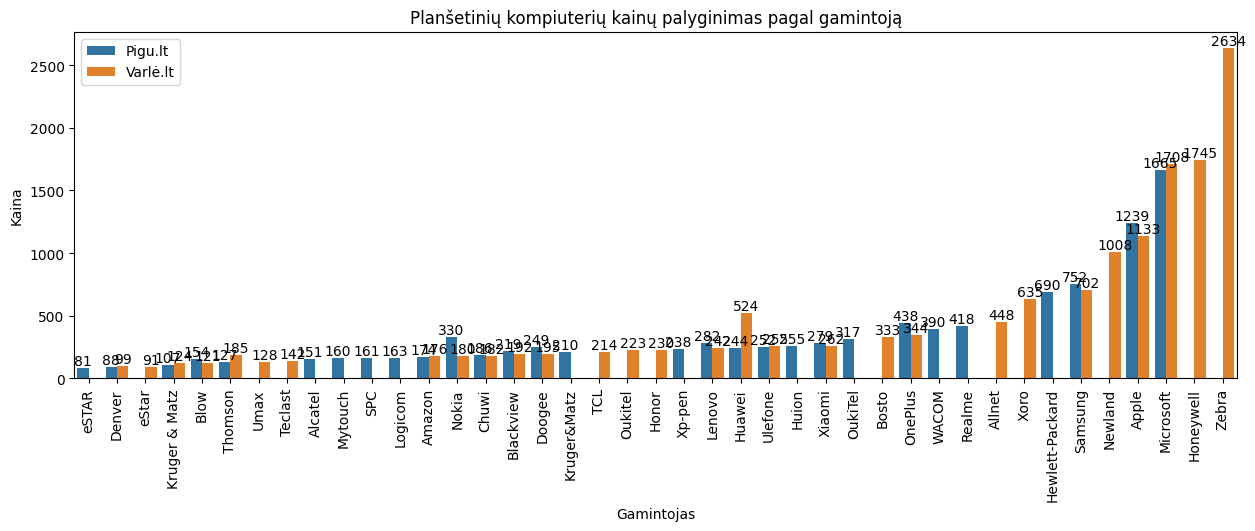

In [172]:
dfx = varle_komp[['Kaina', 'Gamintojas', 'Portalas']]
dfy = pigu_komp[['Kaina', 'Gamintojas', 'Portalas']]
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
df_pop = df.groupby(['Gamintojas','Portalas'])['Kaina'].count().reset_index()
df_pop['Kiekis'] = df_pop['Kaina'].apply(lambda x: x)
df_pop = df_pop[['Kiekis', 'Gamintojas', 'Portalas']]
df_graf = df.groupby(['Gamintojas','Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=True)
df_graf = pd.merge(df_graf, df_pop, how='left', on=['Gamintojas', 'Portalas'])
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
df_graf = df_graf[df_graf['Kiekis'] > 2]
fig, axes = plt.subplots(figsize=(15,4.5))
axes.set_title(f'Planšetinių kompiuterių kainų palyginimas pagal gamintoją')
ax =sns.barplot(data=df_graf,x = 'Gamintojas', y='Kaina', ax=axes, hue= 'Portalas')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes.legend()
plt.show()

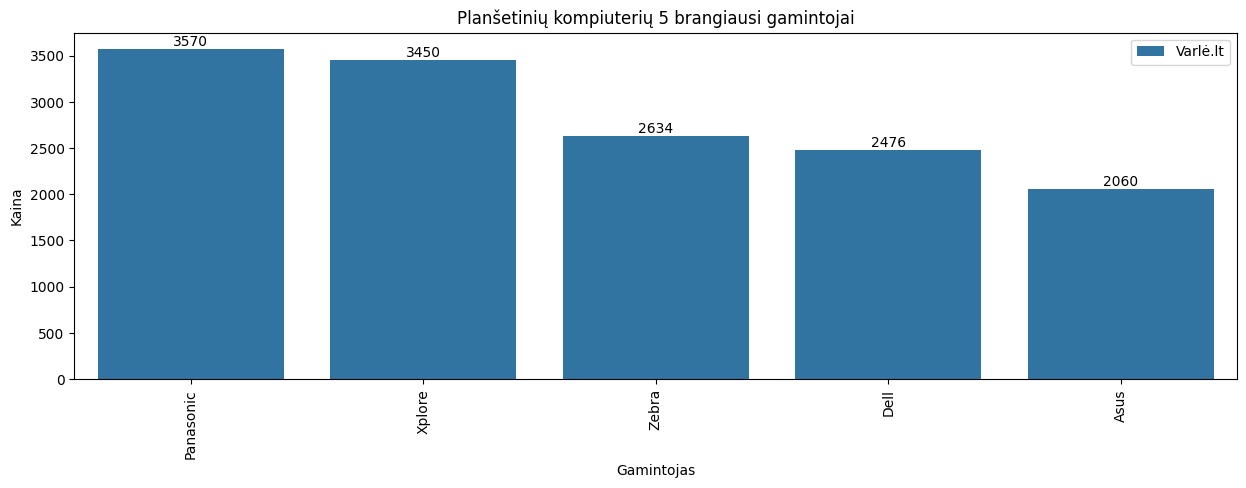

In [173]:
dfx = varle_komp[['Kaina', 'Gamintojas', 'Portalas']]
dfy = pigu_komp[['Kaina', 'Gamintojas', 'Portalas']]
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
df_graf = df.groupby(['Gamintojas','Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=False)[:5]
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
fig, axes = plt.subplots(figsize=(15,4.5))
axes.set_title(f'Planšetinių kompiuterių 5 brangiausi gamintojai')
ax =sns.barplot(data=df_graf,x = 'Gamintojas', y='Kaina', ax=axes, hue= 'Portalas')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes.legend()
plt.show()

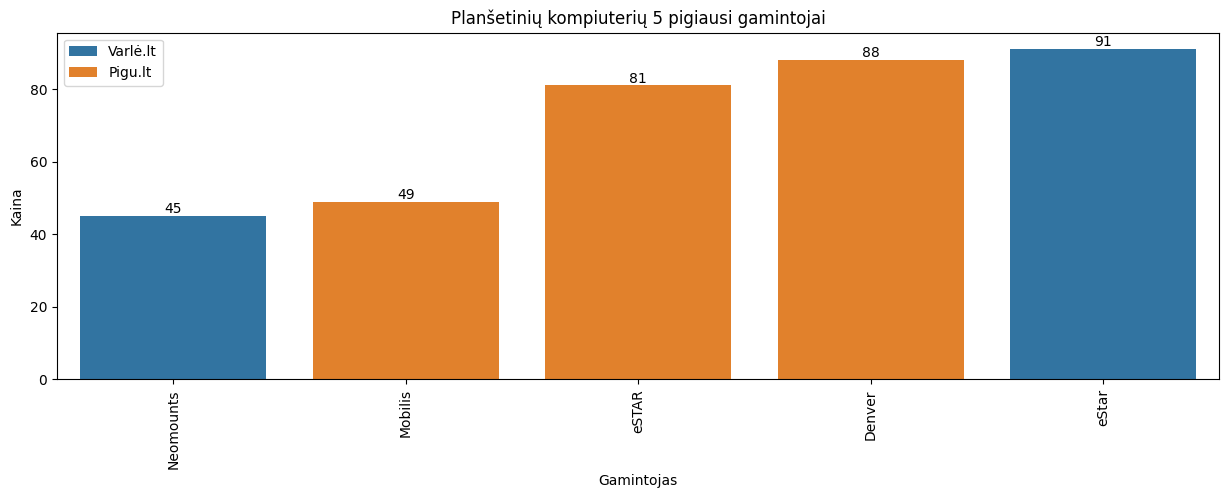

In [174]:
dfx = varle_komp[['Kaina', 'Gamintojas', 'Portalas']]
dfy = pigu_komp[['Kaina', 'Gamintojas', 'Portalas']]
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
df_graf = df.groupby(['Gamintojas','Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=True)[:5]
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
fig, axes = plt.subplots(figsize=(15,4.5))
axes.set_title(f'Planšetinių kompiuterių 5 pigiausi gamintojai')
ax =sns.barplot(data=df_graf,x = 'Gamintojas', y='Kaina', ax=axes, hue= 'Portalas')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes.legend()
plt.show()

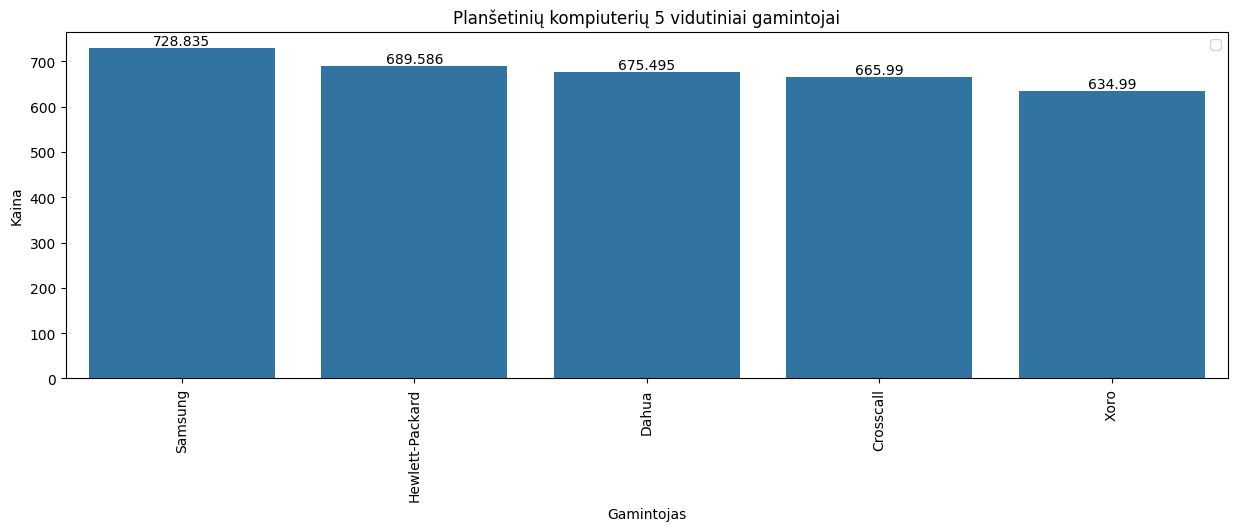

In [175]:
dfx = varle_komp[['Kaina', 'Gamintojas', 'Portalas']]
dfy = pigu_komp[['Kaina', 'Gamintojas', 'Portalas']]
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
vid_kaina = df['Kaina'].sum()/df['Kaina'].count()
df_graf = df.groupby(['Gamintojas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=True)
df_graf['Nukrypimas nuo vidutinės kainos'] = df_graf['Kaina'].apply(lambda x: abs(x-vid_kaina))
df_graf = df_graf.sort_values(by='Nukrypimas nuo vidutinės kainos', ascending=True)[:5]
fig, axes = plt.subplots(figsize=(15,4.5))
axes.set_title(f'Planšetinių kompiuterių 5 vidutiniai gamintojai')
ax =sns.barplot(data=df_graf,x = 'Gamintojas', y='Kaina', ax=axes)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes.legend()
plt.show()

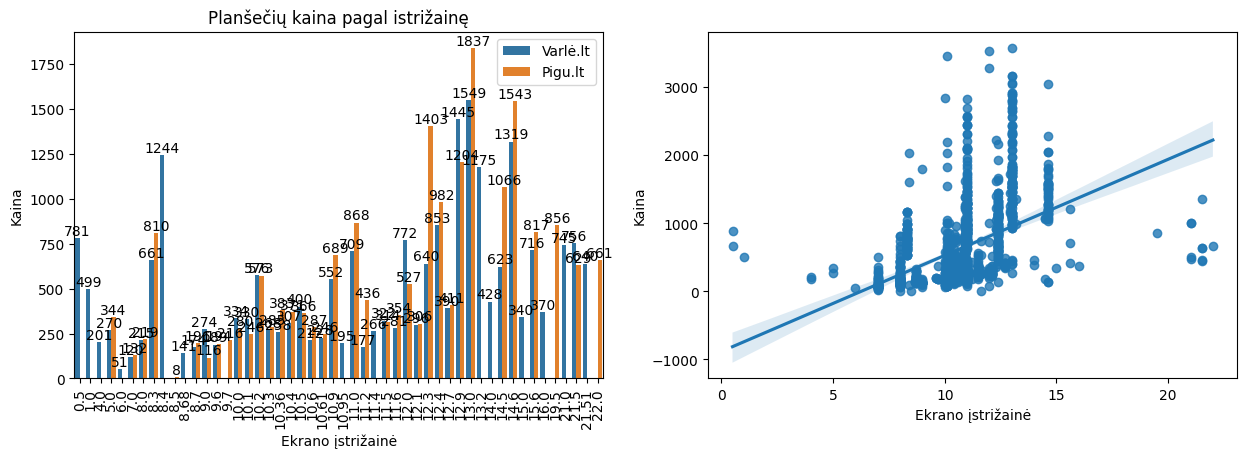

In [176]:
dfx = varle_komp[['Kaina', 'Ekrano įstrižainė', 'Portalas']]
dfy = pigu_komp[['Kaina', 'Ekrano įstrižainė', 'Portalas']]
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
df_graf = df.groupby(['Ekrano įstrižainė','Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=True)
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
fig, axes = plt.subplots(1,2,figsize=(15,4.5))
axes[0].set_title(f'Planšečių kaina pagal istrižainę')
ax =sns.barplot(data=df_graf[df_graf['Ekrano įstrižainė']<23],x = 'Ekrano įstrižainė', y='Kaina', ax=axes[0], hue= 'Portalas')
sns.regplot(data=df[df['Ekrano įstrižainė']<23], x = 'Ekrano įstrižainė', y = 'Kaina', order=1)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes[0].legend()
plt.show()

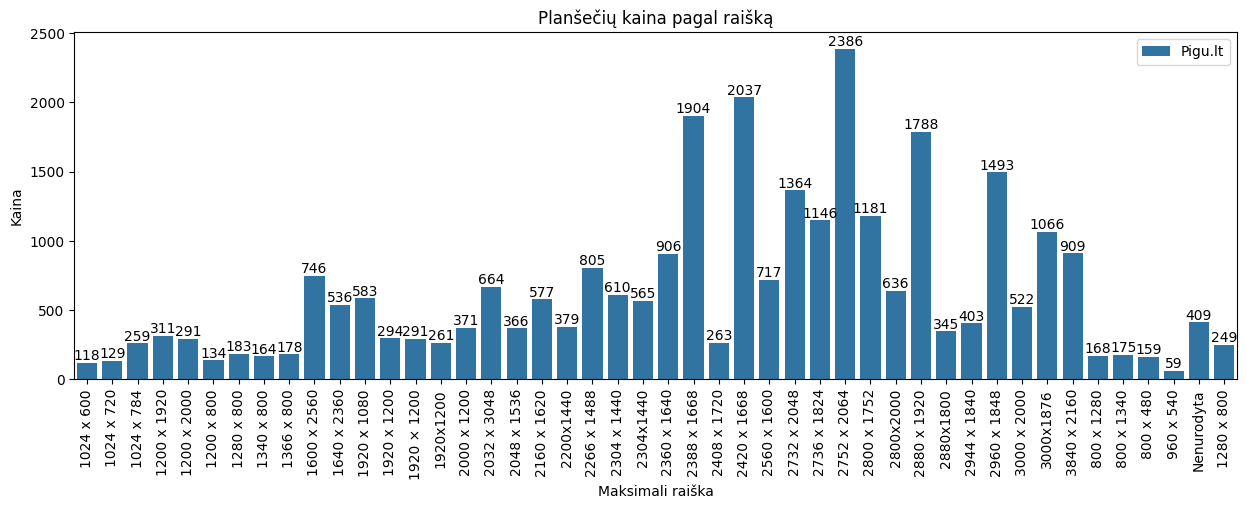

In [177]:
df = pigu_komp[['Kaina', 'Maksimali raiška', 'Portalas']]
df.dropna(inplace=True)
df_graf = df.groupby(['Maksimali raiška','Portalas'])['Kaina'].mean().reset_index()
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
fig, axes = plt.subplots(figsize=(15,4.5))
axes.set_title(f'Planšečių kaina pagal raišką')
ax =sns.barplot(data=df_graf,x = 'Maksimali raiška', y='Kaina', ax=axes, hue= 'Portalas')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes.legend()
plt.show()

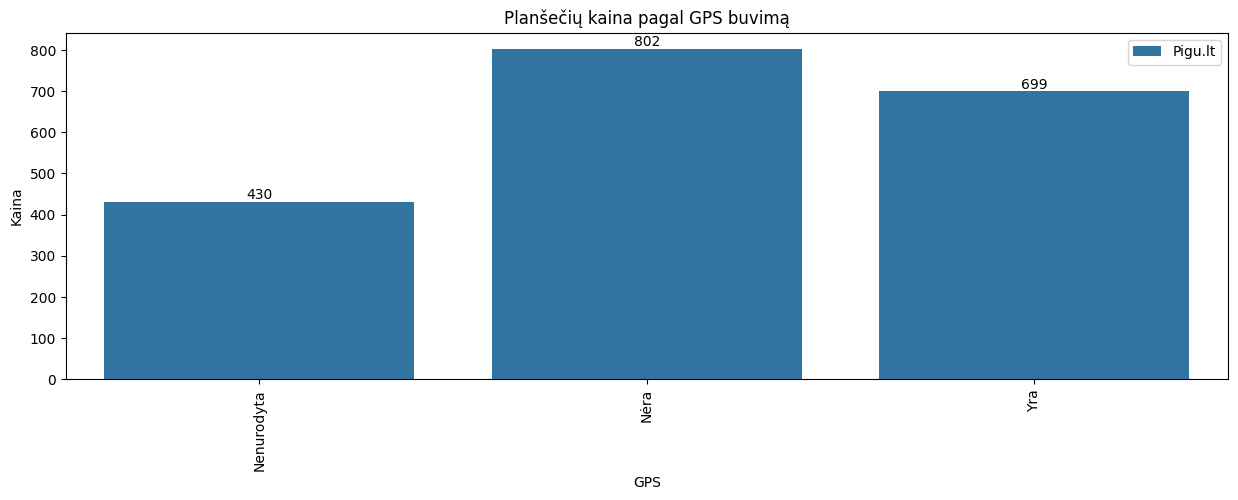

In [178]:
df = pigu_komp[['Kaina', 'GPS', 'Portalas']]
df.dropna(inplace=True)
df_graf = df.groupby(['GPS','Portalas'])['Kaina'].mean().reset_index()
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
fig, axes = plt.subplots(figsize=(15,4.5))
axes.set_title(f'Planšečių kaina pagal GPS buvimą')
ax =sns.barplot(data=df_graf,x = 'GPS', y='Kaina', ax=axes, hue= 'Portalas')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes.legend()
plt.show()

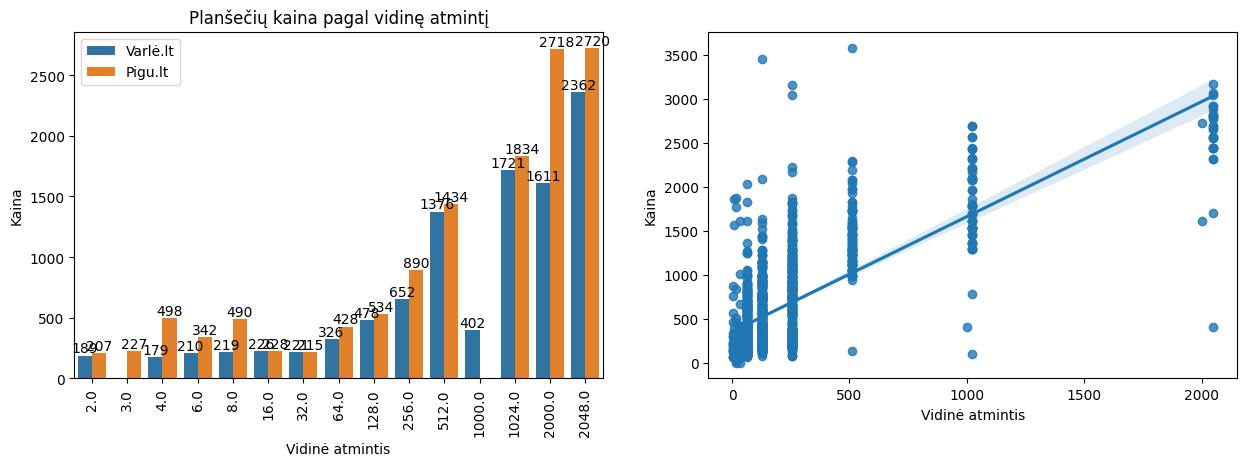

In [179]:
dfx = varle_komp[['Kaina', 'Vidinė atmintis', 'Portalas']]
dfy = pigu_komp[['Kaina', 'Vidinė atmintis', 'Portalas']]
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
df_graf = df.groupby(['Vidinė atmintis','Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=True)
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
fig, axes = plt.subplots(1,2,figsize=(15,4.5))
axes[0].set_title(f'Planšečių kaina pagal vidinę atmintį')
ax =sns.barplot(data=df_graf,x = 'Vidinė atmintis', y='Kaina', ax=axes[0], hue= 'Portalas')
sns.regplot(data=df, x = 'Vidinė atmintis', y = 'Kaina', order=1)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes[0].legend()
plt.show()

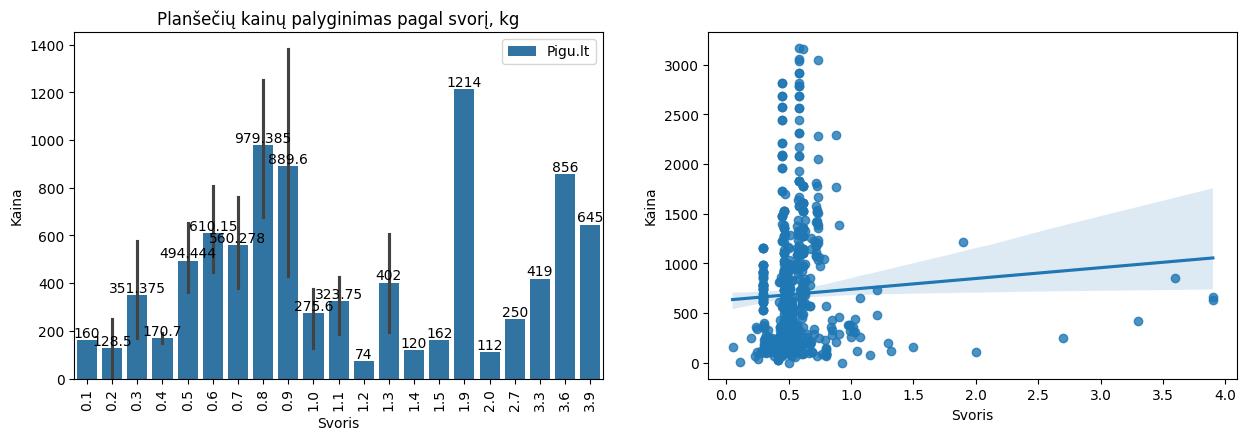

In [180]:
dfx = varle_komp[['Kaina', 'Svoris', 'Portalas']]
dfy = pigu_komp[['Kaina', 'Svoris', 'Portalas']]
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
df_graf = df.groupby(['Svoris','Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=True)
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
df_graf['Svoris'] = df_graf['Svoris'].apply(lambda x: round((np.ceil(x/0.1))*0.1,1))
fig, axes = plt.subplots(1,2,figsize=(15,4.5))
axes[0].set_title(f'Planšečių kainų palyginimas pagal svorį, kg')
ax =sns.barplot(data=df_graf[df_graf['Svoris']<100],x = 'Svoris', y='Kaina', ax=axes[0], hue= 'Portalas')
sns.regplot(data=df[df['Svoris']<100], x = 'Svoris', y = 'Kaina', order=1)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes[0].legend()
plt.show()

In [201]:
dfx = varle_komp[['Kaina', 'Kaina_Group', 'Portalas','Vidinė atmintis','Ekrano įstrižainė','Gamintojas']]
dfy = pigu_komp[['Kaina', 'Kaina_Group', 'Portalas','Vidinė atmintis','Ekrano įstrižainė','Gamintojas']]

zodynas = {}
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
grupes = list(set(df['Kaina_Group']))
for gr in grupes:
    zod = {}
    dfq = df[df['Kaina_Group'] == gr]
    zod['Portalas'] = list(dfq.groupby(['Portalas'])['Kaina'].count().reset_index().sort_values(by='Kaina', ascending=False)[:1]['Portalas'])
    min_val = min(list(set(dfq['Vidinė atmintis'])))
    max_val = max(list(set(dfq['Vidinė atmintis'])))
    zod['Vidinė atmintis'] = f'{min_val}-{max_val}'
    min_val = min(list(set(dfq['Ekrano įstrižainė'])))
    max_val = max(list(set(dfq['Ekrano įstrižainė'])))
    zod['Ekrano įstrižainė'] = f'{min_val}-{max_val}'
    zod['Gamintojas'] = list(set(dfq['Gamintojas']))
    zodynas[gr] = zod
ndf = pd.DataFrame(zodynas)
ndf.head(10)
print(pd. __version__)

2.2.2


In [182]:
# Prekių grupė - televizoriai. Ar yra kainų priklausomybė tarp maksimalios raiškos, ekrano
# įstrižainės? Koks kainų lygis/pasiskirstymas tarp 5-kių daugiausiai vienetų turinčių gamintojų?
# Ar televizoriuje veikianti OS turi įtaką kainų lygiui?
# Suskirstykite televizorius pagal kainas į rėžius: iki 100 €, 101-200 €, 201-500 € ir daugiau
# nei 500 €, ir apibūdinkite, koks vidutiniškiausias gaminys geriausiai reprezentuotų atitinkamą
# kainų rėžį.

In [183]:
def kaina(x):
    if x <= 100:
        return 'iki 100 €'
    elif x > 100 and x <= 200:
        return '101-200 €'
    elif x > 200 and x <= 500:
        return '201-500 €'
    elif x > 500:
        return 'virš 500 €'

In [184]:
varle_tel = varle[varle['Kategorija'] == 'televizoriai']
pigu_tel = pigu[pigu['Kategorija'] == 'Televizoriai']
pigu_tel['Kaina'] = pigu_tel['Kaina'].apply(lambda x: float(x) if x != None else None)
varle_tel['Kaina'] = varle_tel['Kaina'].apply(lambda x: float(x) if x != None else None)
pigu_tel['Kaina_Group'] = pigu_tel['Kaina'].apply(kaina)
varle_tel['Kaina_Group'] = varle_tel['Kaina'].apply(kaina)
pigu_tel['Ekrano įstrižainė'] = pigu_tel['Ekrano įstrižainė'].apply(istriz)
varle_tel['Ekrano įstrižainė'] = varle_tel['Ekrano įstrižainė'].apply(lambda x: float(x) if x != None else None)

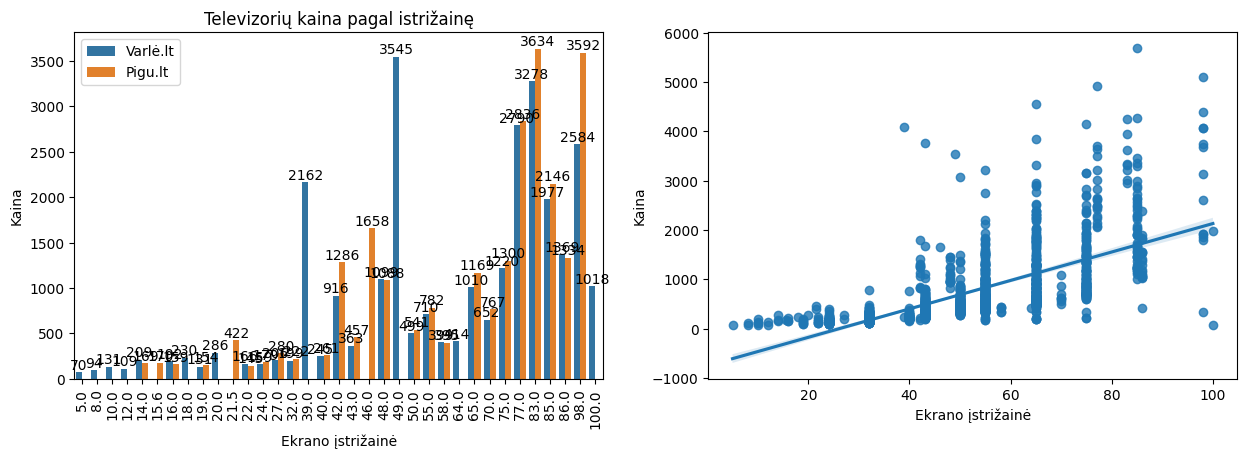

In [185]:
dfx = varle_tel[['Kaina', 'Ekrano įstrižainė', 'Portalas']]
dfy = pigu_tel[['Kaina', 'Ekrano įstrižainė', 'Portalas']]
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
df_graf = df.groupby(['Ekrano įstrižainė','Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=True)
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
fig, axes = plt.subplots(1,2,figsize=(15,4.5))
axes[0].set_title(f'Televizorių kaina pagal istrižainę')
ax =sns.barplot(data=df_graf[df_graf['Ekrano įstrižainė']<1000],x = 'Ekrano įstrižainė', y='Kaina', ax=axes[0], hue= 'Portalas')
sns.regplot(data=df[df['Ekrano įstrižainė']<1000], x = 'Ekrano įstrižainė', y = 'Kaina', order=1)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes[0].legend()
plt.show()

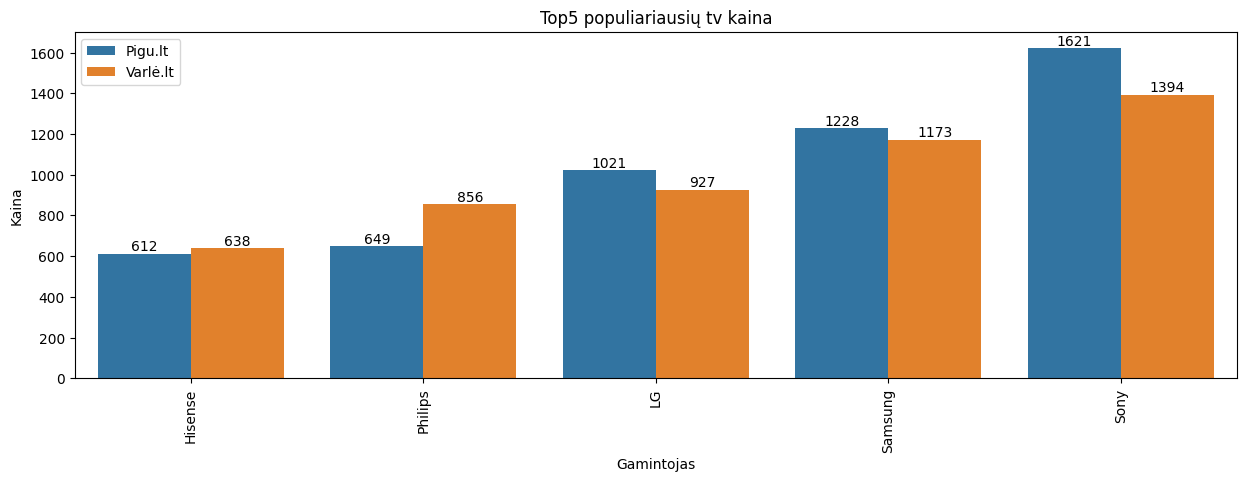

In [186]:
dfx = varle_tel[['Kaina', 'Gamintojas', 'Portalas']]
dfy = pigu_tel[['Kaina', 'Gamintojas', 'Portalas']]
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
df_pop = list(df.groupby(['Gamintojas'])['Kaina'].count().reset_index().sort_values(by='Kaina', ascending=False)[:5]['Gamintojas'])
df_graf = df[df['Gamintojas'].isin(df_pop)].groupby(['Gamintojas','Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=True)
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
fig, axes = plt.subplots(figsize=(15,4.5))
axes.set_title(f'Top5 populiariausių tv kaina')
ax =sns.barplot(data=df_graf,x = 'Gamintojas', y='Kaina', ax=axes, hue= 'Portalas')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes.legend()
plt.show()

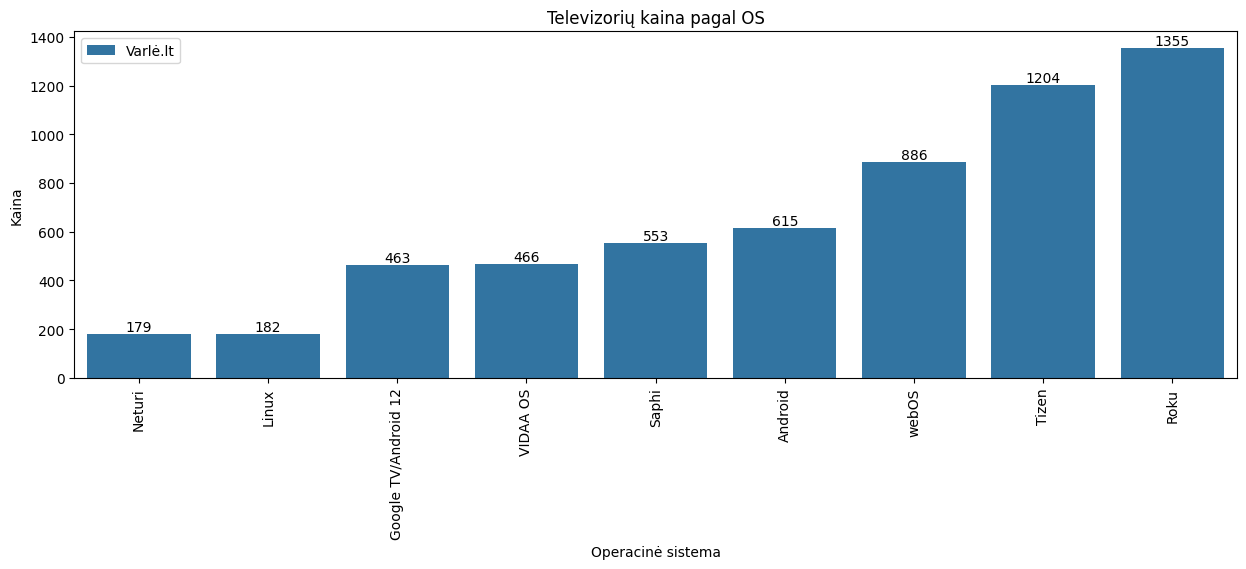

In [187]:
df = varle_tel[['Kaina', 'Operacinė sistema', 'Portalas']]
df.dropna(inplace=True)
df_graf = df.groupby(['Operacinė sistema','Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=True)
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
fig, axes = plt.subplots(figsize=(15,4.5))
axes.set_title(f'Televizorių kaina pagal OS')
ax =sns.barplot(data=df_graf,x = 'Operacinė sistema', y='Kaina', ax=axes, hue= 'Portalas')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes.legend()
plt.show()

In [188]:
dfx = varle_tel[['Kaina', 'Kaina_Group','Portalas','Ekrano įstrižainė','Gamintojas']]
dfy = pigu_tel[['Kaina', 'Kaina_Group', 'Portalas','Ekrano įstrižainė','Gamintojas']]

zodynas = {}
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
df = df[df['Ekrano įstrižainė']<1000]
grupes = list(set(df['Kaina_Group']))
for gr in grupes:
    zod = {}
    dfq = df[df['Kaina_Group'] == gr]
    zod['Portalas'] = list(dfq.groupby(['Portalas'])['Kaina'].count().reset_index().sort_values(by='Kaina', ascending=False)[:1]['Portalas'])
    min_val = min(list(set(dfq['Ekrano įstrižainė'])))
    max_val = max(list(set(dfq['Ekrano įstrižainė'])))
    zod['Ekrano įstrižainė'] = f'{min_val}-{max_val}'
    zod['Gamintojas'] = list(set(dfq['Gamintojas']))
    zodynas[gr] = zod
ndf = pd.DataFrame(zodynas)
ndf.head(10)

,virš 500 €,201-500 €,101-200 €,iki 100 €
Portalas,[Varlė.lt],[Varlė.lt],[Varlė.lt],[Varlė.lt]
Ekrano įstrižainė,32.0-100.0,14.0-98.0,8.0-55.0,5.0-100.0
Gamintojas,"[tcl, Toshiba, GoGen, Elit, Dahua, Kruger & Ma...","[Google, tcl, Toshiba, GoGen, Šilelis, Kruger ...","[tcl, Toshiba, GoGen, Cabletech, Kruger & Matz...","[Manta, Nvox, AllView, Kiano, One For All]"


In [189]:
# Prekių grupė - dviračiai. Įvertinkite kainų lygį/pasiskirstymą tarp skirtingų gamintojų. Suraskite
# 3-is brangiausius, 3 vidutinius gamintojus, ir įvertinkite, ar yra kainų/kainų lygio/kainų
# pasiskirstymo priklausomybė nuo dviračio rėmo, paskirties (vyrams/moterims), rūšies (mieto/
# kalnų/...), ratų skersmens, pavarų skaičiaus. Į vizualizacijas/trendus neimkite tų gamintojų,
# kurie turi 1-2 vnt. prekyboje.

In [190]:
def skirta(x):
    if x != None:
        if 'Vyrams' in x and 'Moterims' in x:
            return 'Vyrams ir moterims'
        elif 'Vyrams' in x and 'Moterims' not in x:
            return 'Vyrams'
        elif 'Vyrams' not in x and 'Moterims' in x:
            return 'Moterims'
        elif 'Universalus' in x:
            return 'Universalus'
        elif 'Vaikams' in x:
            return 'Vaikams'
        elif 'Paaugliams' in x:
            return 'Paaugliams'
        elif 'Berniukams' in x:
            return 'Vaikams'
        elif 'Mergaitėms' in x:
            return 'Vaikams'
    else:
        return None

In [191]:
def tipas(x):
    if x != None:
        if 'Vienaračiai' in x:
            return 'Vienaračiai'
        elif 'Triratukai' in x:
            return 'Triratukai'
        elif 'Dviratukai' in x:
            return 'Dviratukai'
        elif 'Vaikiški' in x:
            return 'Vaikiški'
        elif 'Triračiai' in x:
            return 'Triračiai'
        elif 'Miesto' in x:
            return 'Miesto'
        elif 'Kalnų' in x:
            return 'Kalnų'
        elif 'Fatbike' in x:
            return 'Fatbike'
        elif 'Trekking' in x:
            return 'Trekking'
        elif 'Hibridiniai' in x:
            return 'Hibridiniai'
        elif 'Turistiniai' in x:
            return 'Turistiniai'
        elif 'Sulankstomi' in x:
            return 'Sulankstomi'
        elif 'BMX' in x:
            return 'BMX'
        elif 'Gravel' in x:
            return 'Gravel'
        elif 'Elektriniai' in x:
            return 'Elektriniai'
        elif 'Plento' in x:
            return 'Plento'
        else:
            return None
    else:
        return None    

In [192]:
varle_dvir = varle[varle['Kategorija'] == 'dviraciai']
pigu_dvir = pigu[pigu['Kategorija'] == 'Dviračiai']
pigu_dvir['Kaina'] = pigu_dvir['Kaina'].apply(lambda x: float(x) if x != None else None)
varle_dvir['Kaina'] = varle_dvir['Kaina'].apply(lambda x: float(x) if x != None and x != '11.\n                    07\n                \n' else None)
pigu_dvir['Skirta'] = pigu_dvir['Skirta'].apply(skirta)
varle_dvir['Skirta'] = varle_dvir['Skirta'].apply(skirta)
pigu_dvir['Tipas'] = pigu_dvir['Dviračių tipai'].apply(tipas)
varle_dvir['Tipas'] = varle_dvir['Tipas'].apply(tipas)
pigu_dvir['Ratų skersmuo'] = pigu_dvir['Ratų skersmuo'].apply(lambda x: float(x.split(' "')[0]) if x != None else None)
varle_dvir['Ratų skersmuo'] = varle_dvir['Ratų dydis (coliais)'].apply(lambda x: float(x) if x != None else None)

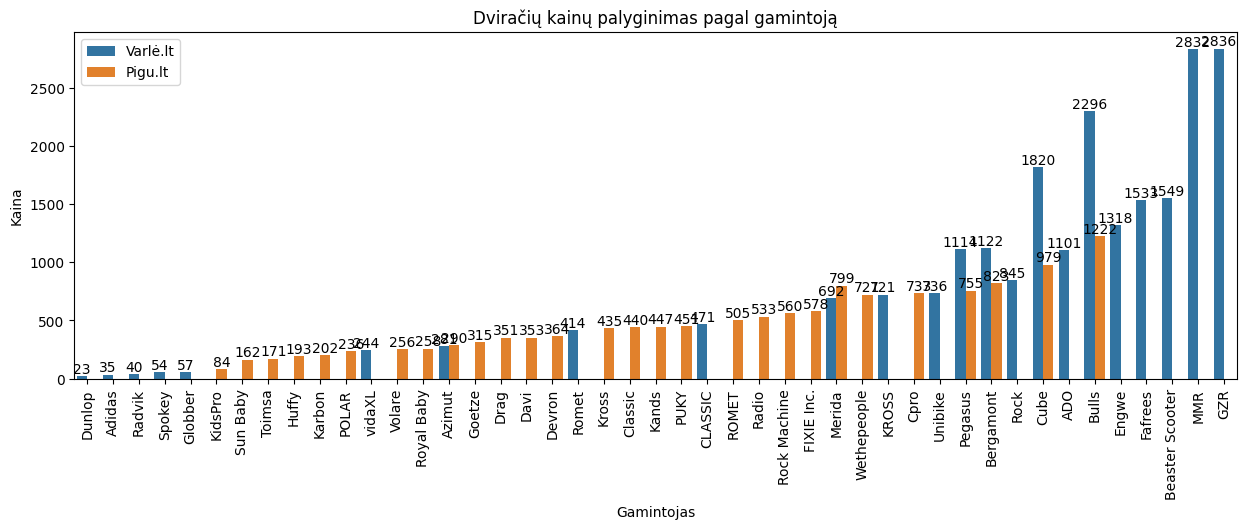

In [193]:
dfx = varle_dvir[['Kaina', 'Gamintojas', 'Portalas']]
dfy = pigu_dvir[['Kaina', 'Gamintojas', 'Portalas']]
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
df_pop = df.groupby(['Gamintojas','Portalas'])['Kaina'].count().reset_index()
df_pop['Kiekis'] = df_pop['Kaina'].apply(lambda x: x)
df_pop = df_pop[['Kiekis', 'Gamintojas', 'Portalas']]
df_graf = df.groupby(['Gamintojas','Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=True)
df_graf = pd.merge(df_graf, df_pop, how='left', on=['Gamintojas', 'Portalas'])
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
df_graf = df_graf[df_graf['Kiekis'] > 15]
fig, axes = plt.subplots(figsize=(15,4.5))
axes.set_title(f'Dviračių kainų palyginimas pagal gamintoją')
ax =sns.barplot(data=df_graf,x = 'Gamintojas', y='Kaina', ax=axes, hue= 'Portalas')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes.legend()
plt.show()

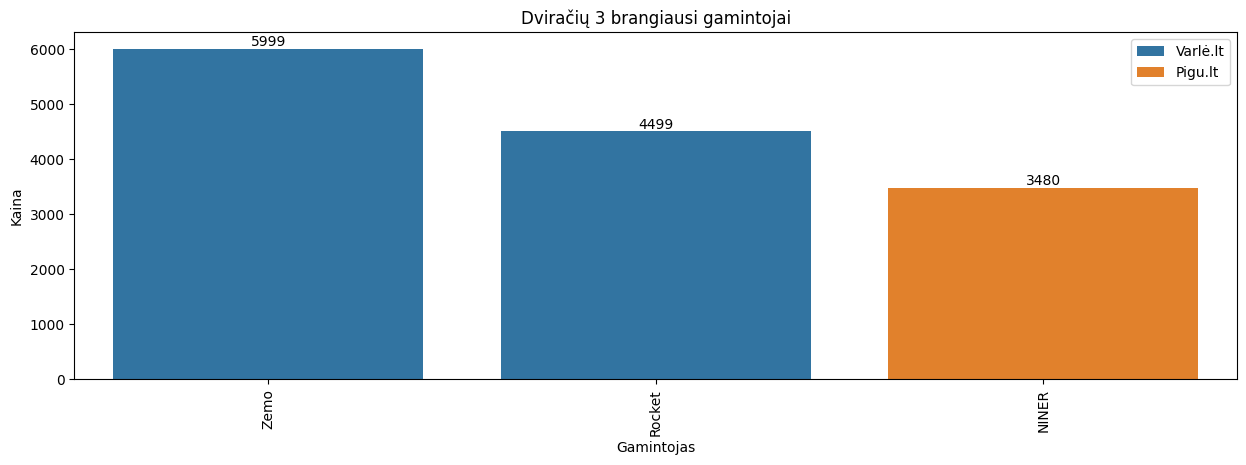

In [194]:
dfx = varle_dvir[['Kaina', 'Gamintojas', 'Portalas']]
dfy = pigu_dvir[['Kaina', 'Gamintojas', 'Portalas']]
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
brang = list(df.groupby(['Gamintojas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=False)[:3]['Gamintojas'])
df_graf = df[df['Gamintojas'].isin(brang)].groupby(['Gamintojas','Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=False)
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
fig, axes = plt.subplots(figsize=(15,4.5))
axes.set_title(f'Dviračių 3 brangiausi gamintojai')
ax =sns.barplot(data=df_graf,x = 'Gamintojas', y='Kaina', ax=axes, hue= 'Portalas')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes.legend()
plt.show()

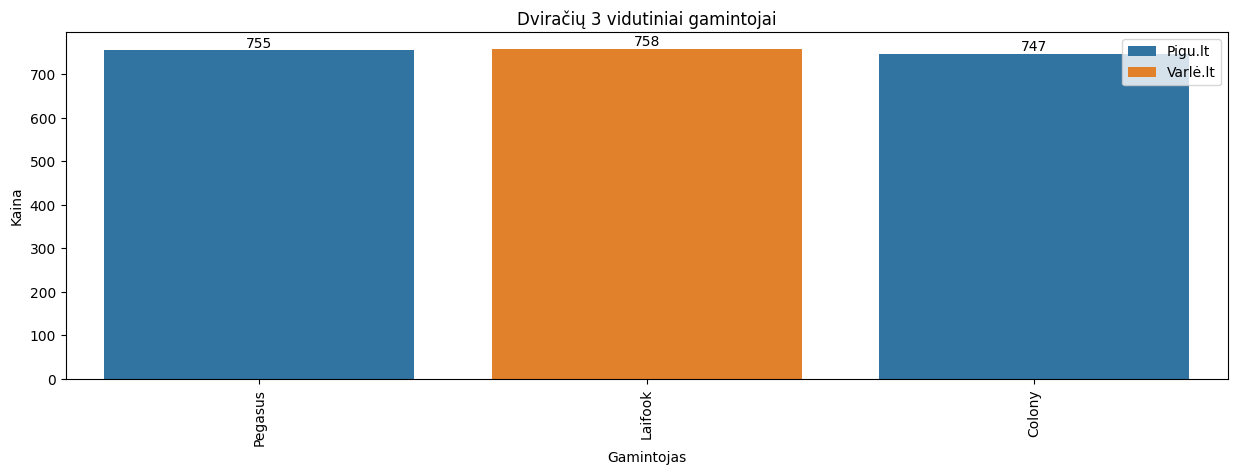

In [195]:
dfx = varle_dvir[['Kaina', 'Gamintojas', 'Portalas']]
dfy = pigu_dvir[['Kaina', 'Gamintojas', 'Portalas']]
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
vid_kaina = df['Kaina'].sum()/df['Kaina'].count()
df_graf = df.groupby(['Gamintojas', 'Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=True)
df_graf['Nukrypimas nuo vidutinės kainos'] = df_graf['Kaina'].apply(lambda x: abs(x-vid_kaina))
df_graf = df_graf.sort_values(by='Nukrypimas nuo vidutinės kainos', ascending=True)[:3]
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
fig, axes = plt.subplots(figsize=(15,4.5))
axes.set_title(f'Dviračių 3 vidutiniai gamintojai')
ax =sns.barplot(data=df_graf,x = 'Gamintojas', y='Kaina', ax=axes, hue='Portalas')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes.legend()
plt.show()

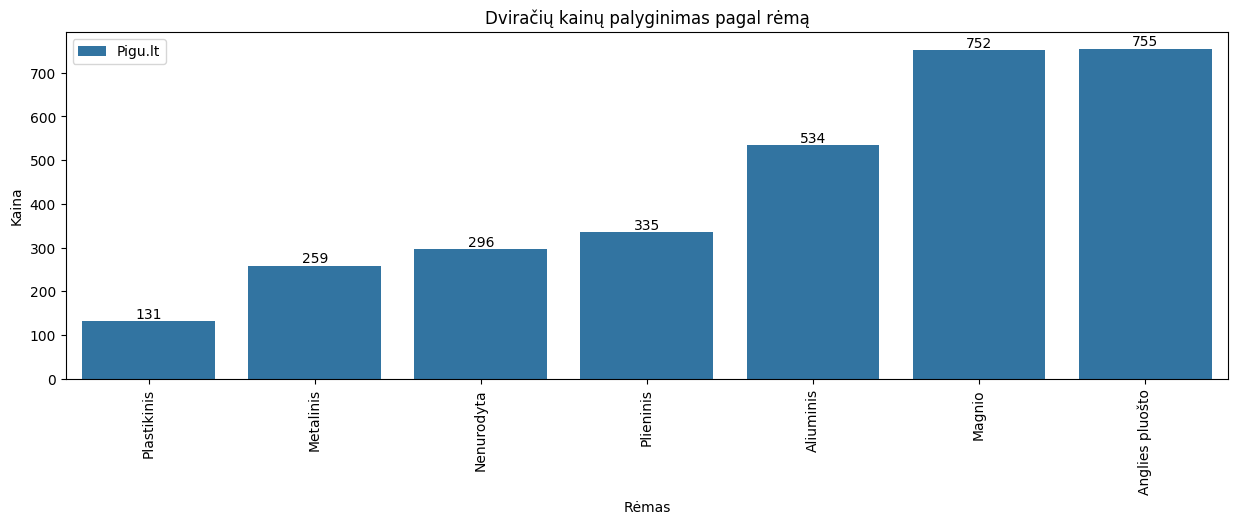

In [196]:
df = pigu_dvir[['Kaina', 'Gamintojas', 'Portalas', 'Rėmas']]
df.dropna(inplace=True)
df_pop = df.groupby(['Gamintojas'])['Kaina'].count().reset_index()
df_pop['Kiekis'] = df_pop['Kaina'].apply(lambda x: x)
pop = list(df_pop[df_pop['Kiekis']>2]['Gamintojas'])
df_graf = df[df['Gamintojas'].isin(pop)].groupby(['Rėmas','Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=True)
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
fig, axes = plt.subplots(figsize=(15,4.5))
axes.set_title(f'Dviračių kainų palyginimas pagal rėmą')
ax =sns.barplot(data=df_graf,x = 'Rėmas', y='Kaina', ax=axes, hue= 'Portalas')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes.legend()
plt.show()

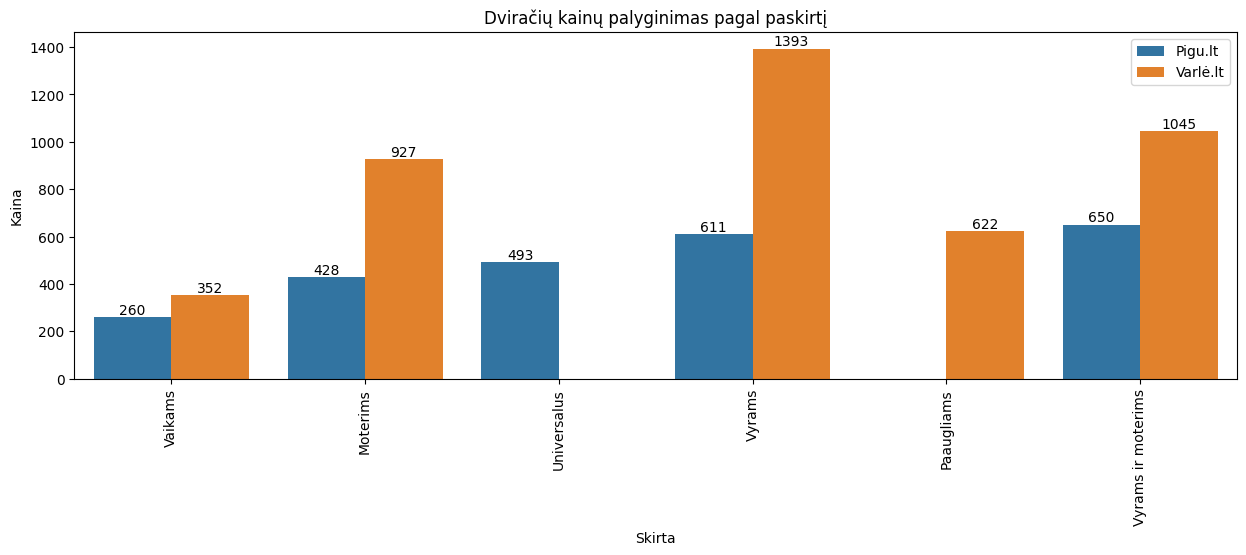

In [197]:
dfx = pigu_dvir[['Kaina', 'Gamintojas', 'Portalas', 'Skirta']]
dfy = varle_dvir[['Kaina', 'Gamintojas', 'Portalas', 'Skirta']]
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
df_pop = df.groupby(['Gamintojas'])['Kaina'].count().reset_index()
df_pop['Kiekis'] = df_pop['Kaina'].apply(lambda x: x)
pop = list(df_pop[df_pop['Kiekis']>2]['Gamintojas'])
df_graf = df[df['Gamintojas'].isin(pop)].groupby(['Skirta','Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=True)
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
fig, axes = plt.subplots(figsize=(15,4.5))
axes.set_title(f'Dviračių kainų palyginimas pagal paskirtį')
ax =sns.barplot(data=df_graf,x = 'Skirta', y='Kaina', ax=axes, hue= 'Portalas')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes.legend()
plt.show()

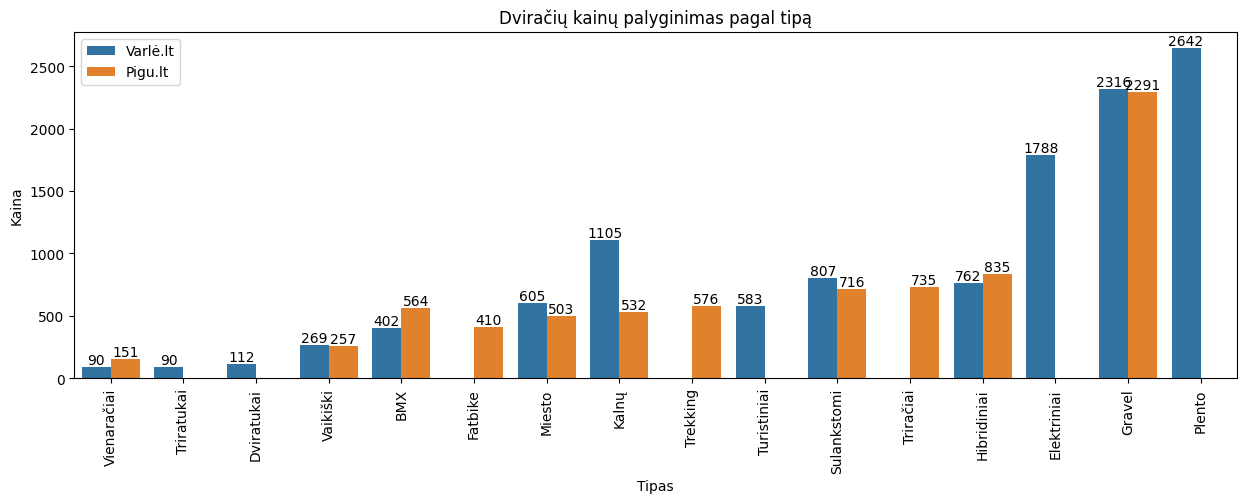

In [198]:
dfx = pigu_dvir[['Kaina', 'Gamintojas', 'Portalas', 'Tipas']]
dfy = varle_dvir[['Kaina', 'Gamintojas', 'Portalas', 'Tipas']]
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
df_pop = df.groupby(['Gamintojas'])['Kaina'].count().reset_index()
df_pop['Kiekis'] = df_pop['Kaina'].apply(lambda x: x)
pop = list(df_pop[df_pop['Kiekis']>2]['Gamintojas'])
df_graf = df[df['Gamintojas'].isin(pop)].groupby(['Tipas','Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=True)
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
fig, axes = plt.subplots(figsize=(15,4.5))
axes.set_title(f'Dviračių kainų palyginimas pagal tipą')
ax =sns.barplot(data=df_graf,x = 'Tipas', y='Kaina', ax=axes, hue= 'Portalas')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes.legend()
plt.show()

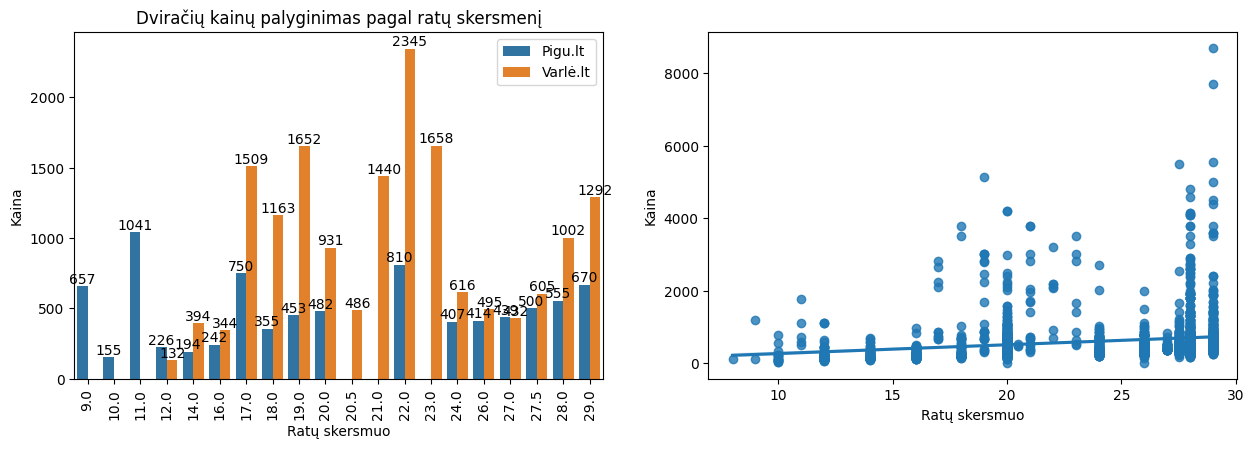

In [199]:
dfx = pigu_dvir[['Kaina', 'Gamintojas', 'Portalas', 'Ratų skersmuo']]
dfy = varle_dvir[['Kaina', 'Gamintojas', 'Portalas', 'Ratų skersmuo']]
df = pd.concat([dfx,dfy])
df.dropna(inplace=True)
df_pop = df.groupby(['Gamintojas'])['Kaina'].count().reset_index()
df_pop['Kiekis'] = df_pop['Kaina'].apply(lambda x: x)
pop = list(df_pop[df_pop['Kiekis']>2]['Gamintojas'])
df_graf = df[df['Gamintojas'].isin(pop)].groupby(['Ratų skersmuo','Portalas'])['Kaina'].mean().reset_index().sort_values(by='Kaina', ascending=True)
df_graf['Kaina'] = df_graf['Kaina'].apply(lambda x: round(x,0))
fig, axes = plt.subplots(1,2,figsize=(15,4.5))
axes[0].set_title(f'Dviračių kainų palyginimas pagal ratų skersmenį')
ax =sns.barplot(data=df_graf,x = 'Ratų skersmuo', y='Kaina', ax=axes[0], hue= 'Portalas')
sns.regplot(data=df, x = 'Ratų skersmuo', y = 'Kaina', order=1)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)
axes[0].legend()
plt.show()